In [1]:
import os
import numpy as np
import scipy
from collections import Counter
import sys
from IPython.display import SVG
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import matplotlib as ml

In [2]:
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=12)

# PCA


In [25]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.historical.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,ID,popID
0,GAST_7_1965_GAST_7_1965,-0.076568,-0.049429,-0.037776,-0.071212,0.140711,-0.257551,0.053043,0.227008,-0.104466,GAST_7_1965,GAST
1,KALM_2_1955_KALM_2_1955,-0.032070,0.011742,-0.053602,0.108455,-0.060299,0.021081,0.019708,0.013952,-0.043981,KALM_2_1955,KALM
2,GAST_10_1965_GAST_10_1965,-0.052269,0.023025,-0.018199,-0.036101,0.349492,-0.052437,0.569462,-0.299808,0.504647,GAST_10_1965,GAST
3,GAST_8_1965_GAST_8_1965,-0.077998,0.023599,0.101821,-0.677222,-0.570747,0.018692,0.210924,0.234400,0.158962,GAST_8_1965,GAST
4,KALM_5_1961_KALM_5_1961,-0.036677,0.011519,-0.058748,0.136051,-0.022237,-0.024968,0.026921,0.023759,-0.071439,KALM_5_1961,KALM
5,ITAL_1_1946_ITAL_1_1946,0.791287,-0.566623,-0.084931,-0.060082,-0.016225,-0.032828,-0.002444,-0.010911,0.020242,ITAL_1_1946,ITAL
6,GAST_11_1965_GAST_11_1965,-0.040547,0.001457,-0.054425,0.111565,-0.023724,0.010717,-0.033073,0.031640,-0.004550,GAST_11_1965,GAST
7,UPPS_3_1969_UPPS_3_1969,-0.039020,0.008526,-0.059028,0.090803,-0.076344,0.029525,0.050102,0.043708,-0.068638,UPPS_3_1969,UPPS
8,GAST_1_1941_GAST_1_1941,-0.056492,-0.021607,-0.056299,-0.047870,0.005242,0.079642,-0.119471,0.000352,0.063159,GAST_1_1941,GAST
9,UPPS_2_1958_UPPS_2_1958,-0.041084,-0.006334,-0.074577,0.140883,-0.052179,0.040729,0.057690,0.051924,-0.024270,UPPS_2_1958,UPPS


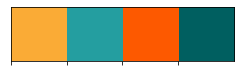

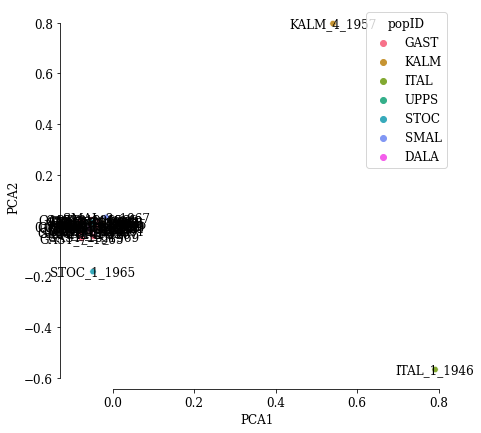

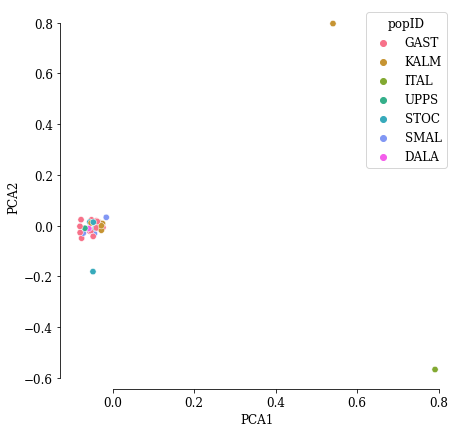

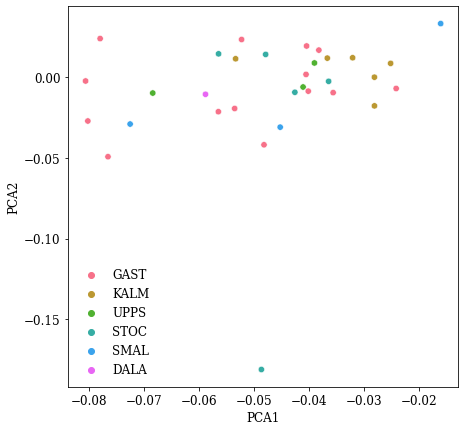

In [49]:
#print(df['loc'])
#eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
#split_eigval = eigval.split('\n')
#print(split_eigval[2])


flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
#sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()


filtered_df = df.drop([5, 24])

# Plot the scatter plot
sns.scatterplot(x=filtered_df['PCA1'], y=filtered_df['PCA2'], hue=filtered_df['popID'], s=40)

# Add labels to each dot
#for i in range(len(filtered_df)):
#    plt.text(filtered_df['PCA1'].iloc[i], filtered_df['PCA2'].iloc[i], filtered_df['ID'].iloc[i], ha='center', va='center')

# Adjust plot aesthetics
#sns.despine(offset=2, trim=True)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)

plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()
##df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
##data=df[df["alpha"] == 1]
##sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
##plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
#plt.show()





#df

#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)

#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

In [43]:
filtered_df = df.drop([5, 24])
filtered_df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,ID,popID
0,GAST_7_1965_GAST_7_1965,-0.076568,-0.049429,-0.037776,-0.071212,0.140711,-0.257551,0.053043,0.227008,-0.104466,GAST_7_1965,GAST
1,KALM_2_1955_KALM_2_1955,-0.032070,0.011742,-0.053602,0.108455,-0.060299,0.021081,0.019708,0.013952,-0.043981,KALM_2_1955,KALM
2,GAST_10_1965_GAST_10_1965,-0.052269,0.023025,-0.018199,-0.036101,0.349492,-0.052437,0.569462,-0.299808,0.504647,GAST_10_1965,GAST
3,GAST_8_1965_GAST_8_1965,-0.077998,0.023599,0.101821,-0.677222,-0.570747,0.018692,0.210924,0.234400,0.158962,GAST_8_1965,GAST
4,KALM_5_1961_KALM_5_1961,-0.036677,0.011519,-0.058748,0.136051,-0.022237,-0.024968,0.026921,0.023759,-0.071439,KALM_5_1961,KALM
6,GAST_11_1965_GAST_11_1965,-0.040547,0.001457,-0.054425,0.111565,-0.023724,0.010717,-0.033073,0.031640,-0.004550,GAST_11_1965,GAST
7,UPPS_3_1969_UPPS_3_1969,-0.039020,0.008526,-0.059028,0.090803,-0.076344,0.029525,0.050102,0.043708,-0.068638,UPPS_3_1969,UPPS
8,GAST_1_1941_GAST_1_1941,-0.056492,-0.021607,-0.056299,-0.047870,0.005242,0.079642,-0.119471,0.000352,0.063159,GAST_1_1941,GAST
9,UPPS_2_1958_UPPS_2_1958,-0.041084,-0.006334,-0.074577,0.140883,-0.052179,0.040729,0.057690,0.051924,-0.024270,UPPS_2_1958,UPPS
10,STOC_4_1965_STOC_4_1965,-0.036436,-0.002821,-0.048249,0.029452,-0.008278,-0.071909,-0.000307,-0.039515,0.009504,STOC_4_1965,STOC


In [59]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))
df["year"] = df.iloc[:, 0].apply(lambda x: ''.join(x.split('_')[2]))
df

df.to_csv('/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.meta.csv', index=False)

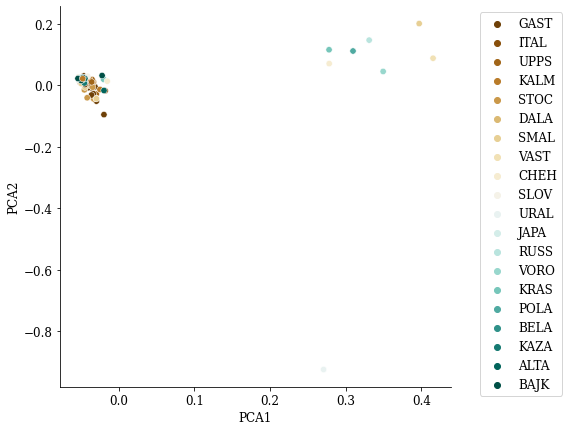

In [92]:
# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)

# Adjust plot aesthetics
sns.despine()
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

#plt.scatter(df['PCA1'], df['PCA2'], c=df['popID'], s=40, cmap='magma')

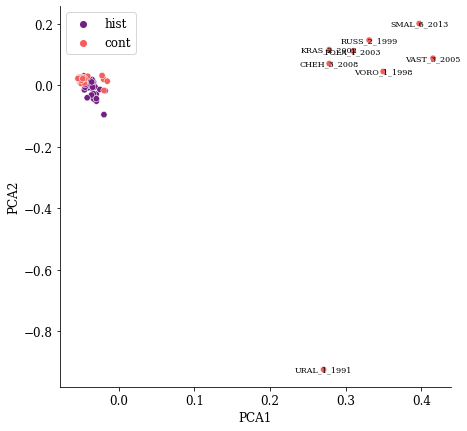

In [70]:
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['time'], s=40,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=True)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    if df['PCA1'][i] > 0.2:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)


# Adjust plot aesthetics
sns.despine() #(offset=2, trim=True) #plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

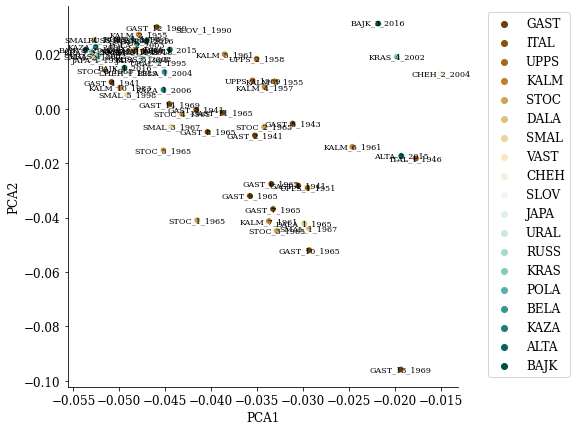

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[df['PCA1'] < 0.2]

sns.scatterplot(x=filtered_df['PCA1'], y=filtered_df['PCA2'], hue=filtered_df['popID'], s=40, palette="BrBG")
sns.despine()
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
for i in range(len(df)):
    if df['PCA1'][i] < 0.2:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)
#plt.legend(frameon=True)
plt.show()



### Contemporary only freebayes call


In [3]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp.PCA.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,ID,popID
0,SMAL_4_1996_SMAL_4_1996,-0.085182,-0.006093,-0.001303,0.010554,-0.001963,-0.003571,0.005044,-0.005262,0.028512,SMAL_4_1996,SMAL
1,KAZA_1_2006_KAZA_1_2006,-0.075742,-0.008960,-0.002688,0.013381,-0.001407,-0.000051,-0.000992,-0.005715,0.064680,KAZA_1_2006,KAZA
2,POLA_2_2003_POLA_2_2003,-0.083855,-0.006312,-0.001895,0.010599,-0.001034,-0.001805,0.005543,-0.003511,0.033334,POLA_2_2003,POLA
3,KRAS_4_2002_KRAS_4_2002,-0.073198,-0.002247,-0.000557,0.007588,-0.004807,-0.002151,-0.000450,-0.003951,0.016120,KRAS_4_2002,KRAS
4,RUSS_3_1999_RUSS_3_1999,-0.085457,-0.004465,-0.002245,0.008148,-0.003112,-0.002966,0.004992,-0.002380,0.033284,RUSS_3_1999,RUSS
5,KALM_9_1981_KALM_9_1981,-0.082904,-0.007120,-0.002398,0.011128,-0.003656,-0.000620,0.004600,-0.002340,0.034106,KALM_9_1981,KALM
6,RUSS_4_2008_RUSS_4_2008,-0.082286,-0.005134,-0.001633,0.009124,-0.002692,0.000656,0.005238,-0.005533,0.032854,RUSS_4_2008,RUSS
7,RUSS_1_1998_RUSS_1_1998,-0.083040,-0.005794,-0.000699,0.010417,-0.001466,-0.003350,0.005376,-0.002253,0.029518,RUSS_1_1998,RUSS
8,BELA_1_2004_BELA_1_2004,-0.082426,-0.006182,-0.003314,0.008503,-0.002042,0.001940,0.002845,-0.001445,0.026943,BELA_1_2004,BELA
9,RUSS_5_2008_RUSS_5_2008,-0.079035,-0.007095,-0.005329,0.011129,-0.001969,-0.000770,0.006558,-0.006750,0.042381,RUSS_5_2008,RUSS


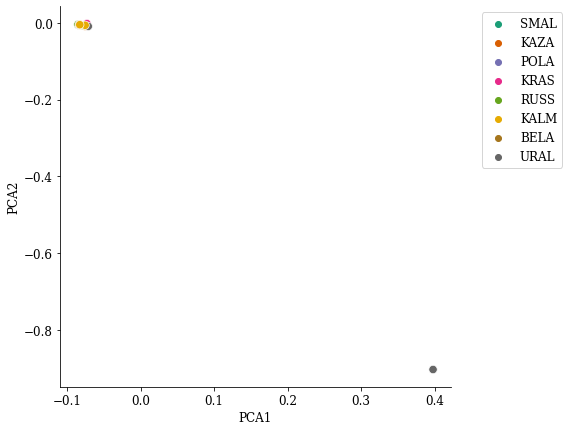

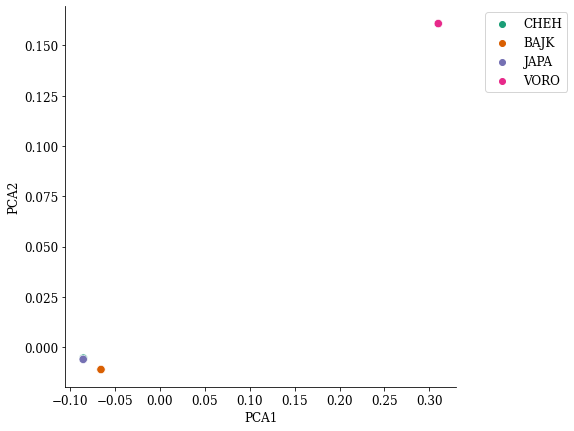

In [18]:
# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'][0:15], y=df['PCA2'][0:15], hue=df['popID'][0:15], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()
#plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

#plt.scatter(df['PCA1'], df['PCA2'], c=df['popID'], s=40, cmap='magma')

# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()
#plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

### Contemporary reduced set call with mpileup

### No pruning

In [9]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp.reduced.noprune.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,ID,popID
0,URAL_2_1995_URAL_2_1995,0.118951,0.007918,0.273857,-0.115483,0.003557,-0.889874,-0.048416,0.052678,0.021120,-0.316228,URAL_2_1995,URAL
1,RUSS_4_2008_RUSS_4_2008,0.157938,0.057527,-0.356124,-0.094191,0.041531,0.015578,0.356973,0.263583,-0.732923,-0.316228,RUSS_4_2008,RUSS
2,JAPA_1_1994_JAPA_1_1994,0.167099,0.063977,-0.279391,-0.033481,0.045643,0.116745,-0.829279,0.291272,0.023443,-0.316228,JAPA_1_1994,JAPA
3,CHEH_1_1989_CHEH_1_1989,0.152715,0.041291,0.562081,-0.619793,-0.159944,0.384365,0.038673,0.008995,0.000306,-0.316228,CHEH_1_1989,CHEH
4,KRAS_2_2002_KRAS_2_2002,-0.397926,-0.858931,-0.044048,-0.008355,-0.001944,0.040083,-0.000449,0.012508,0.010771,-0.316228,KRAS_2_2002,KRAS
5,RUSS_1_1998_RUSS_1_1998,0.146125,0.041848,0.148953,0.582253,-0.708965,0.097406,0.057117,0.006831,0.016182,-0.316228,RUSS_1_1998,RUSS
6,URAL_1_1991_URAL_1_1991,-0.810656,0.492663,-0.003029,-0.003390,0.000817,0.008282,-0.000848,0.004082,0.003605,-0.316228,URAL_1_1991,URAL
7,STOC_6_1965_STOC_6_1965,0.149802,0.048637,-0.272483,-0.069493,0.047463,0.008104,-0.060041,-0.888353,-0.031995,-0.316228,STOC_6_1965,STOC
8,VAST_1_1983_VAST_1_1983,0.143001,0.033632,0.375832,0.483539,0.680494,0.184615,0.075907,0.017933,0.011042,-0.316228,VAST_1_1983,VAST
9,SMAL_4_1996_SMAL_4_1996,0.172951,0.071437,-0.405648,-0.121607,0.051350,0.034697,0.410362,0.230470,0.678448,-0.316228,SMAL_4_1996,SMAL


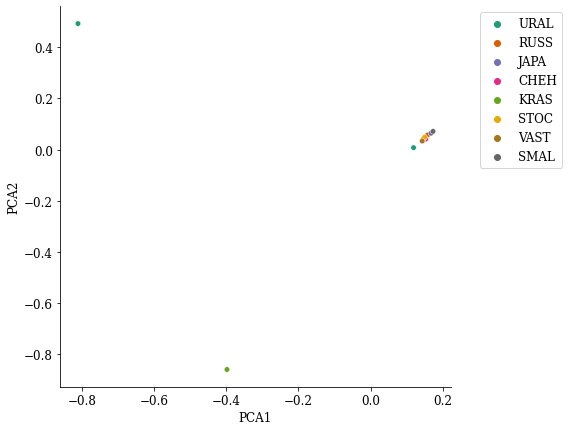

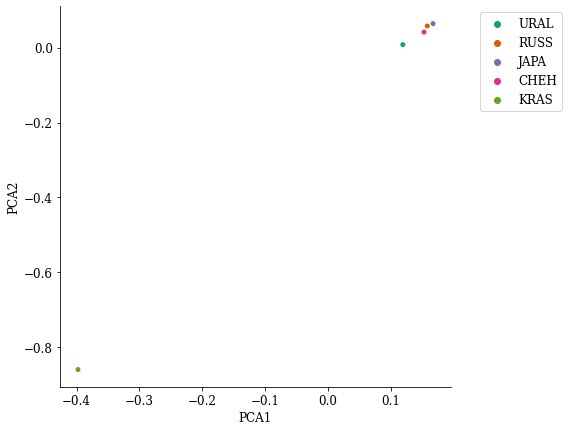

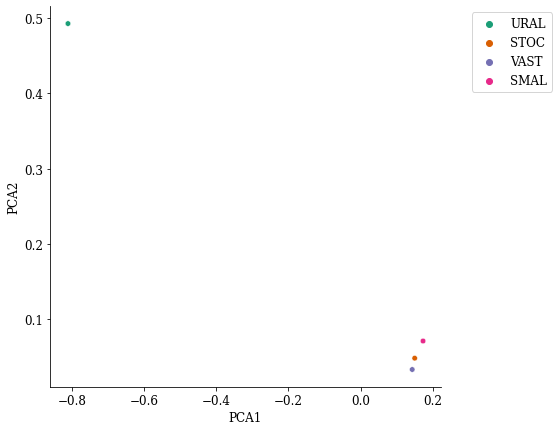

In [21]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'][0:5], y=df['PCA2'][0:5], hue=df['popID'][0:5], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'][6:10], y=df['PCA2'][6:10], hue=df['popID'][6:10], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

### LD pruned

In [7]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp.reduced.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,ID,popID
0,URAL_2_1995_URAL_2_1995,0.010492,0.415741,-0.423697,0.201229,0.021331,0.709295,-0.057400,0.000366,0.013703,-0.316228,URAL_2_1995,URAL
1,RUSS_4_2008_RUSS_4_2008,0.265265,-0.352533,-0.102796,0.159539,-0.381180,-0.037389,-0.213215,-0.001656,-0.690779,-0.316228,RUSS_4_2008,RUSS
2,JAPA_1_1994_JAPA_1_1994,0.238994,-0.165673,0.104963,-0.309004,0.675922,0.042002,-0.499083,-0.032347,0.012972,-0.316228,JAPA_1_1994,JAPA
3,CHEH_1_1989_CHEH_1_1989,0.052799,0.450649,-0.394323,0.182145,0.143682,-0.695988,0.015593,0.007739,-0.010644,-0.316228,CHEH_1_1989,CHEH
4,KRAS_2_2002_KRAS_2_2002,-0.584356,-0.176321,0.005273,-0.038680,0.012924,-0.017820,-0.026791,0.724370,0.000998,-0.316228,KRAS_2_2002,KRAS
5,RUSS_1_1998_RUSS_1_1998,0.076506,0.236443,0.750414,0.518492,0.044881,0.023475,0.058184,0.005349,0.017546,-0.316228,RUSS_1_1998,RUSS
6,URAL_1_1991_URAL_1_1991,-0.623089,-0.193082,-0.010606,0.011242,-0.003506,-0.028376,-0.005270,-0.687875,0.014951,-0.316228,URAL_1_1991,URAL
7,STOC_6_1965_STOC_6_1965,0.221050,-0.246261,-0.056664,-0.147486,0.263551,0.068618,0.828088,0.000582,-0.075046,-0.316228,STOC_6_1965,STOC
8,VAST_1_1983_VAST_1_1983,0.055860,0.394297,0.249210,-0.704939,-0.425837,-0.010447,0.009306,-0.028780,-0.002162,-0.316228,VAST_1_1983,VAST
9,SMAL_4_1996_SMAL_4_1996,0.286479,-0.363260,-0.121774,0.127462,-0.351769,-0.053368,-0.109412,0.012251,0.718461,-0.316228,SMAL_4_1996,SMAL


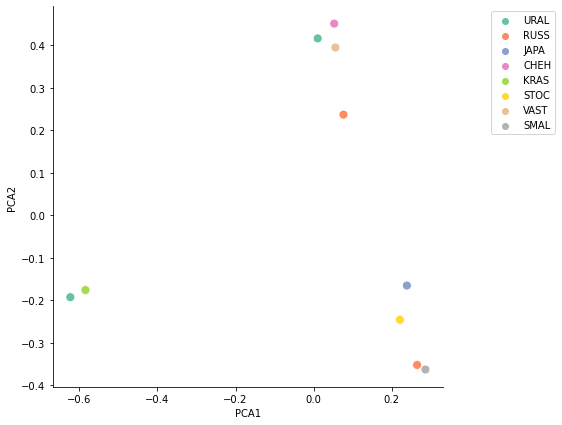

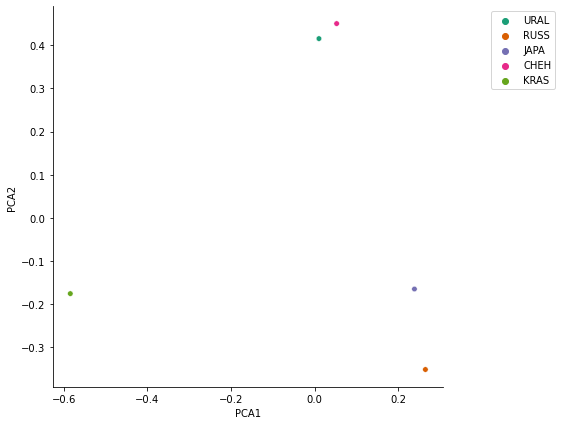

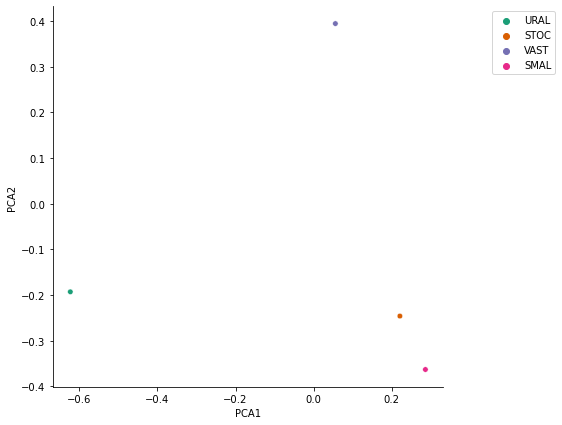

In [8]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'][0:5], y=df['PCA2'][0:5], hue=df['popID'][0:5], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'][6:10], y=df['PCA2'][6:10], hue=df['popID'][6:10], s=30,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

### Testing m caller in mpile up

In [1]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp_mcalling.reduced.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,ID,popID
0,URAL_2_1995_URAL_2_1995,-0.003274,0.476334,0.493703,-0.266262,0.233774,0.531604,-0.143315,0.001071,0.009461,-0.317136,URAL_2_1995,URAL
1,RUSS_4_2008_RUSS_4_2008,0.296616,-0.345327,0.112614,-0.339588,-0.340228,-0.002256,-0.035322,0.023557,-0.667055,-0.319750,RUSS_4_2008,RUSS
2,JAPA_1_1994_JAPA_1_1994,0.232250,-0.134003,-0.063535,0.377880,0.304051,-0.155658,-0.750786,0.018150,0.007376,-0.317071,JAPA_1_1994,JAPA
3,CHEH_1_1989_CHEH_1_1989,0.019311,0.426067,0.265329,-0.022641,0.010728,-0.779940,0.195432,-0.008355,-0.017411,-0.316535,CHEH_1_1989,CHEH
4,KRAS_2_2002_KRAS_2_2002,-0.591438,-0.227938,0.018024,0.017814,-0.003108,-0.000075,-0.017946,-0.703003,-0.019717,-0.320419,KRAS_2_2002,KRAS
5,RUSS_1_1998_RUSS_1_1998,0.052004,0.220368,-0.771492,-0.421532,0.265501,0.020386,0.066947,-0.004299,0.006095,-0.316861,RUSS_1_1998,RUSS
6,URAL_1_1991_URAL_1_1991,-0.593731,-0.221442,0.021539,-0.004924,0.002339,-0.012260,0.001286,0.709962,0.026831,-0.305017,URAL_1_1991,URAL
7,STOC_6_1965_STOC_6_1965,0.253895,-0.238924,0.050177,0.429751,0.432601,0.169203,0.607158,0.005747,-0.074341,-0.318239,STOC_6_1965,STOC
8,VAST_1_1983_VAST_1_1983,0.020928,0.371940,-0.240194,0.489590,-0.637712,0.235756,0.033757,0.014221,0.001897,-0.316587,VAST_1_1983,VAST
9,SMAL_4_1996_SMAL_4_1996,0.296268,-0.330737,0.113755,-0.260891,-0.269640,-0.008959,0.041895,-0.023046,0.740212,-0.314401,SMAL_4_1996,SMAL


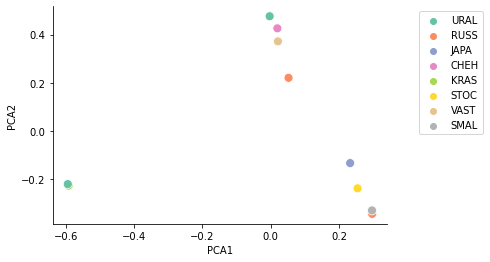

In [4]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

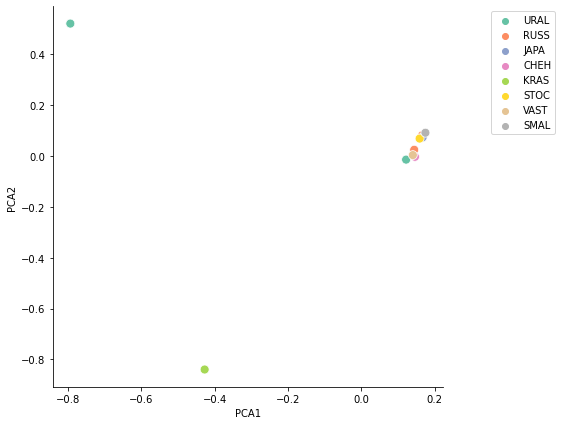

In [6]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp_mcalling.reduced.noprune.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=80,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

### Testing m caller in mpileup: full set, 15 chromosomes

#### Pruned

In [9]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp_mcalling.full.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,ID,popID
0,URAL_2_1995_URAL_2_1995,-0.071007,0.411938,0.410990,0.160152,0.727239,0.008707,0.027811,-0.024078,0.006127,-0.316797,URAL_2_1995,URAL
1,RUSS_4_2008_RUSS_4_2008,-0.208758,-0.342859,0.081935,-0.035032,0.006561,-0.419982,-0.001436,-0.063148,-0.741802,-0.316606,RUSS_4_2008,RUSS
2,JAPA_1_1994_JAPA_1_1994,-0.215986,-0.301336,0.035752,-0.034800,-0.028366,0.678541,0.032804,-0.545383,0.002776,-0.316716,JAPA_1_1994,JAPA
3,CHEH_1_1989_CHEH_1_1989,-0.100899,0.460356,0.421275,0.174858,-0.684840,-0.014851,-0.003164,0.003087,-0.008692,-0.317052,CHEH_1_1989,CHEH
4,KRAS_2_2002_KRAS_2_2002,0.589895,-0.094897,0.002590,-0.001235,-0.000342,0.012174,-0.736443,-0.026642,0.009767,-0.315767,KRAS_2_2002,KRAS
5,RUSS_1_1998_RUSS_1_1998,-0.125667,0.206678,-0.715622,0.571251,0.010852,-0.043795,0.005128,-0.018335,-0.004345,-0.317227,RUSS_1_1998,RUSS
6,URAL_1_1991_URAL_1_1991,0.659065,-0.106719,-0.006486,-0.003312,-0.032035,-0.005332,0.674865,0.014651,-0.003278,-0.312198,URAL_1_1991,URAL
7,STOC_6_1965_STOC_6_1965,-0.198808,-0.279215,0.040458,-0.016277,0.004687,0.321197,-0.010767,0.819582,0.073753,-0.316471,STOC_6_1965,STOC
8,VAST_1_1983_VAST_1_1983,-0.100432,0.387002,-0.353296,-0.783387,0.005093,-0.030661,0.005310,-0.001096,0.000249,-0.317230,VAST_1_1983,VAST
9,SMAL_4_1996_SMAL_4_1996,-0.216335,-0.345227,0.083696,-0.032224,-0.008801,-0.506655,0.013305,-0.158130,0.666367,-0.316182,SMAL_4_1996,SMAL


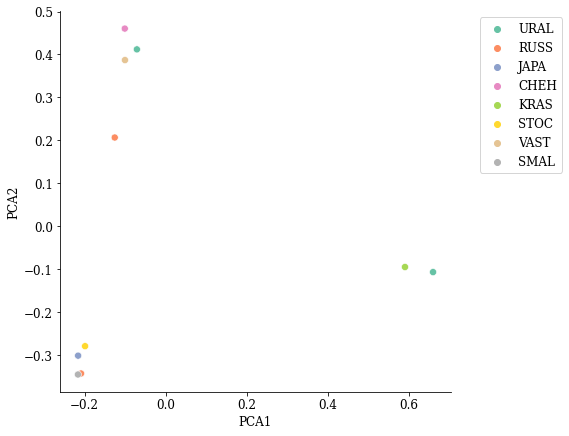

In [10]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

In [11]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp_mcalling.full.noprune.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,ID,popID
0,URAL_2_1995_URAL_2_1995,0.121927,0.036288,0.335716,-0.205957,-0.000626,0.852247,-0.010339,0.045093,-0.013842,-0.316284,URAL_2_1995,URAL
1,RUSS_4_2008_RUSS_4_2008,0.162313,-0.089349,-0.323903,-0.066889,0.063730,-0.009451,0.346757,0.024676,0.794580,-0.316111,RUSS_4_2008,RUSS
2,JAPA_1_1994_JAPA_1_1994,0.174379,-0.102204,-0.335082,-0.052736,0.062000,-0.049965,-0.751868,0.414904,-0.004460,-0.316660,JAPA_1_1994,JAPA
3,CHEH_1_1989_CHEH_1_1989,0.145936,0.029729,0.521868,-0.602680,-0.012774,-0.491352,0.009230,0.008362,0.000302,-0.317025,CHEH_1_1989,CHEH
4,KRAS_2_2002_KRAS_2_2002,-0.435014,0.828541,-0.153469,-0.005539,0.004518,-0.031747,-0.002764,0.011982,-0.006380,-0.315404,KRAS_2_2002,KRAS
5,RUSS_1_1998_RUSS_1_1998,0.144070,-0.012433,0.158990,0.435966,-0.807300,-0.097250,0.027371,0.036813,-0.004886,-0.316901,RUSS_1_1998,RUSS
6,URAL_1_1991_URAL_1_1991,-0.789139,-0.524547,0.053417,-0.002216,0.000729,-0.003415,-0.001007,0.002535,-0.001254,-0.315009,URAL_1_1991,URAL
7,STOC_6_1965_STOC_6_1965,0.157034,-0.076495,-0.262602,-0.040527,0.036018,-0.002277,-0.169856,-0.858484,-0.178906,-0.315804,STOC_6_1965,STOC
8,VAST_1_1983_VAST_1_1983,0.139661,0.017385,0.373255,0.623196,0.577008,-0.135199,0.020385,0.018682,-0.005436,-0.317000,VAST_1_1983,VAST
9,SMAL_4_1996_SMAL_4_1996,0.173738,-0.106925,-0.371203,-0.083584,0.077079,-0.030017,0.533139,0.293759,-0.579938,-0.316073,SMAL_4_1996,SMAL


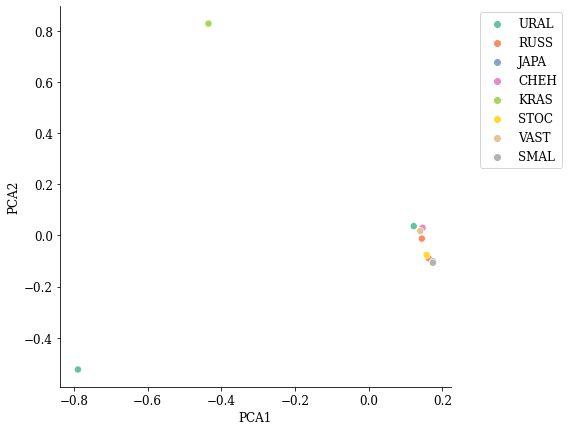

In [12]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50,palette="Set2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

## Full call mpileup

### Miss3 filter set

#### Pruned

In [3]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,ID,popID
0,BAJK_1_2016_BAJK_1_2016,-0.058014,-0.007330,-0.041921,0.013289,0.007449,0.018563,0.002942,0.053572,0.074127,...,-0.035851,0.053506,0.024554,0.050651,0.010575,0.001013,0.007390,0.010494,BAJK_1_2016,BAJK
1,KAZA_1_2006_KAZA_1_2006,-0.063427,-0.010419,-0.048217,0.013829,0.006722,0.018345,0.006328,0.066927,0.084952,...,-0.044987,0.070236,0.030580,0.056550,0.003396,-0.003762,0.005088,0.012213,KAZA_1_2006,KAZA
2,SLOV_1_1990_SLOV_1_1990,-0.053899,-0.030144,0.220447,-0.067302,-0.028743,-0.023837,-0.003827,-0.130944,0.058787,...,0.014122,0.001371,-0.642555,-0.030471,0.310411,0.316232,-0.466921,0.056889,SLOV_1_1990,SLOV
3,URAL_2_1995_URAL_2_1995,-0.054966,-0.033291,0.224375,-0.069328,-0.027227,-0.019038,-0.006004,-0.226754,0.082296,...,-0.010420,0.008547,0.382949,0.036045,0.028915,0.018291,-0.342218,0.010570,URAL_2_1995,URAL
4,RUSS_4_2008_RUSS_4_2008,-0.075882,-0.015374,-0.033649,0.012485,0.008391,0.034180,0.009515,0.107362,0.134512,...,-0.065113,0.101007,0.042217,0.062527,0.002847,-0.017235,-0.005410,0.016270,RUSS_4_2008,RUSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KALM_4_1957_KALM_4_1957,0.402516,-0.696513,-0.223710,-0.534743,0.012630,0.044031,-0.019483,0.003656,0.006867,...,-0.003475,0.001454,-0.000411,-0.002661,-0.000498,-0.000714,-0.001081,0.000648,KALM_4_1957,KALM
69,GAST_3_1941_GAST_3_1941,-0.069061,-0.008821,-0.086343,0.024920,0.010283,0.014091,0.006542,0.003241,0.018075,...,-0.018274,0.029911,0.002299,-0.037876,-0.005077,-0.034449,-0.012375,-0.010126,GAST_3_1941,GAST
70,ITAL_1_1946_ITAL_1_1946,0.248055,-0.160924,0.027193,0.341151,-0.060341,-0.872962,-0.007828,0.084751,0.047480,...,-0.010513,0.020828,0.009502,-0.006417,-0.004667,-0.004747,-0.006414,-0.005787,ITAL_1_1946,ITAL
71,GAST_5_1943_GAST_5_1943,-0.065267,-0.005327,-0.101521,0.025992,0.011848,0.000919,0.002670,-0.041785,-0.044170,...,0.015458,-0.025671,-0.008692,-0.037267,-0.015105,0.003984,0.009862,-0.010555,GAST_5_1943,GAST


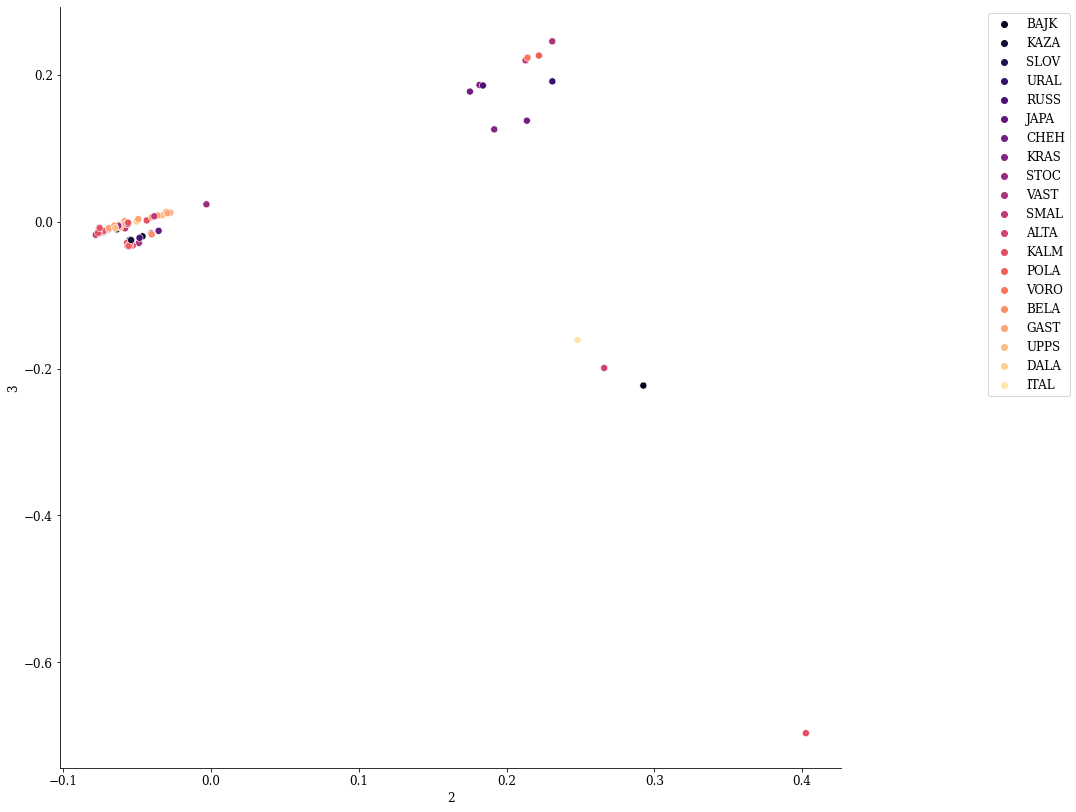

In [12]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=50,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

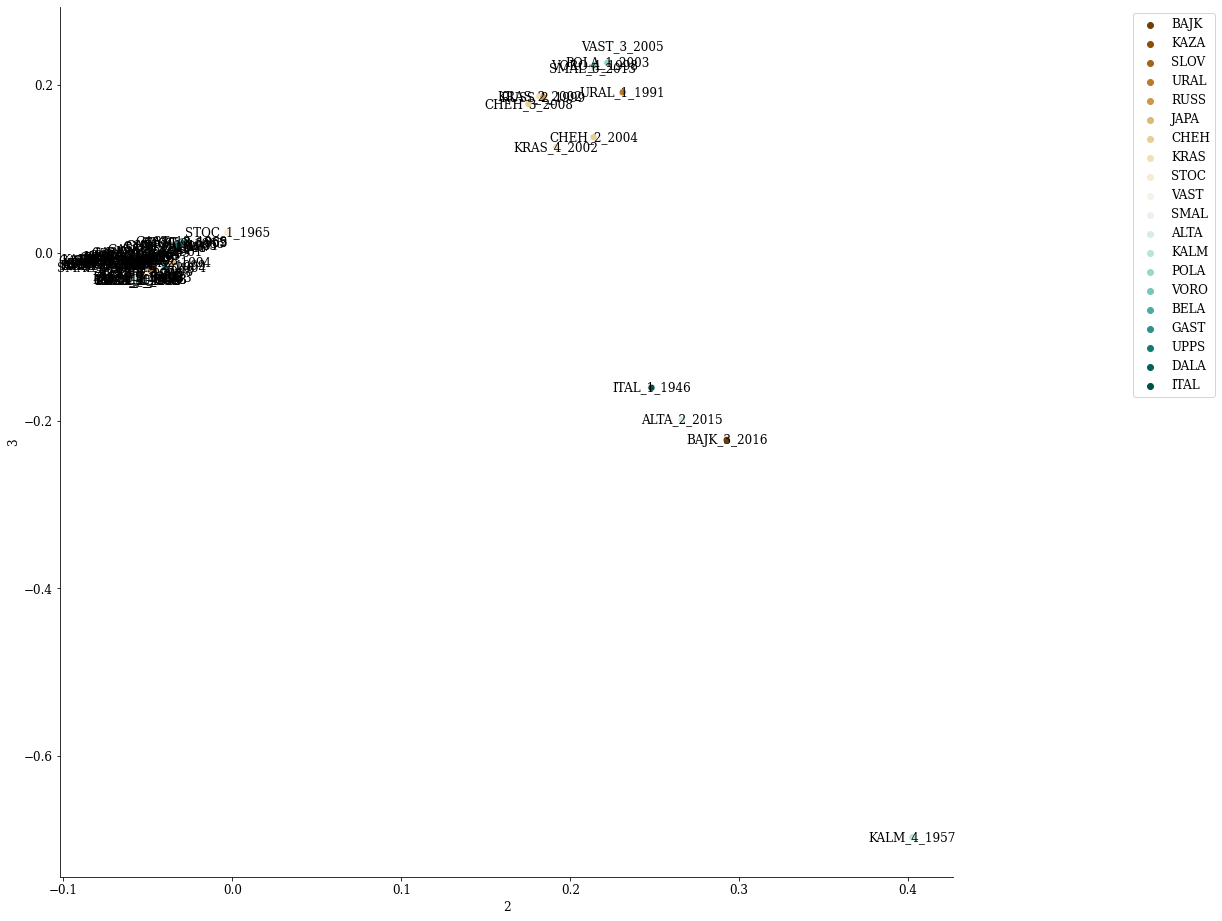

In [13]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=50,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

for i in range(len(df)):
    plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center')
    
plt.show()

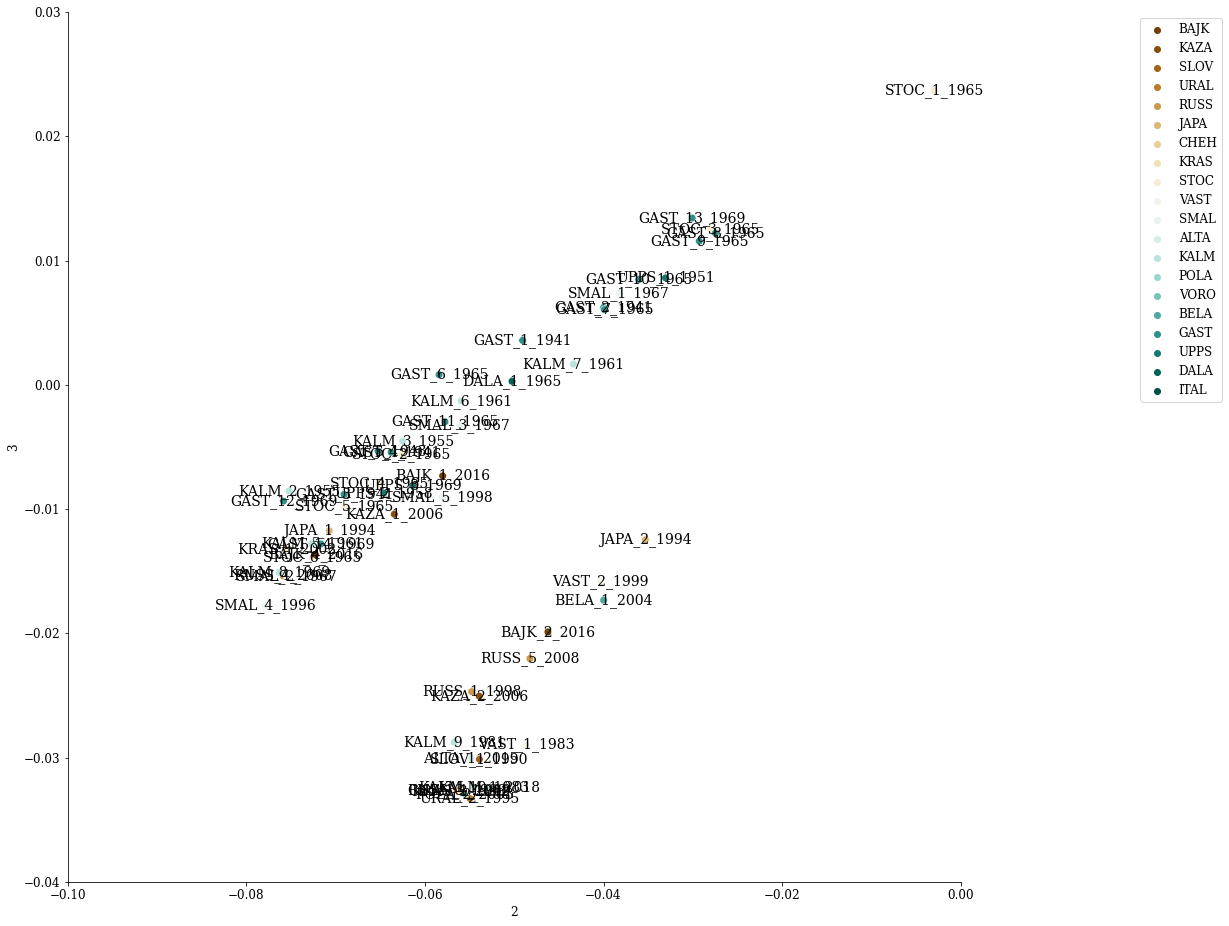

In [27]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=60,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)
for i in range(len(df)):
    if df[2][i] < 0.1:
        plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center', fontsize=14)
    
plt.show()

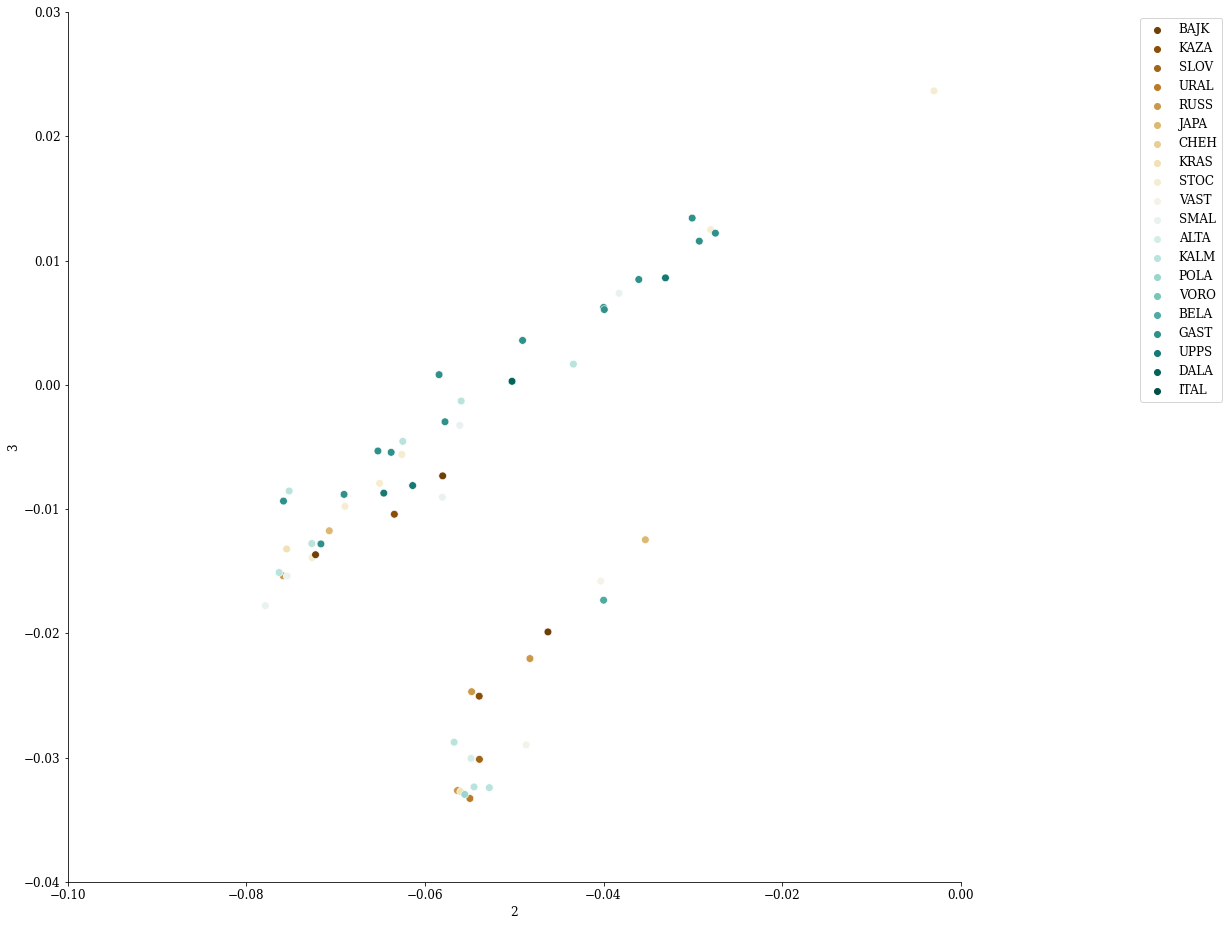

In [28]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=60,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)
#for i in range(len(df)):
#    if df[2][i] < 0.1:
#        plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center', fontsize=14)
    
plt.show()

In [111]:
import pandas as pd
import re

# Read the data from the file
#df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.autosomes.pruned.eigenvec", delimiter=' ', header=None)
df = pd.read_csv("/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.autosomes.pruned.eigenvec", delimiter=' ', header=None)
df

# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))


category_dict = {
'KAZA': 'EAST',
 'SLOV': 'WEST',
 'URAL': 'EAST',
 'RUSS': 'EAST',
 'BAJK': 'EAST',
 'JAPA': 'EAST',
 'CHEH': 'WEST',
 'KRAS': 'EAST',
 'STOC': 'SWEDEN',
 'VAST': 'SWEDEN',
 'SMAL': 'SWEDEN',
 'ALTA': 'EAST',
 'KALM': 'SWEDEN',
 'POLA': 'SWEDEN',
 'VORO': 'WEST',
 'BELA': 'WEST',
 'GAST': 'SWEDEN',
 'UPPS': 'SWEDEN',
 'DALA': 'SWEDEN',
 'ITAL': 'WEST'}

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})

# Categorization dictionary
age_dict = {
    '1940s': 'hist',
    '1950s': 'hist',
    '1960s': 'hist',
    '1980s': 'hist',
    '1990s': 'cont',
    '2000s': 'cont',
    '2010s': 'cont'
}

df['Age'] = df['Decade'].map(age_dict)


df

,1,PCA1,PCA2,4,5,6,7,8,9,10,...,18,19,20,21,ID,popID,Category,Year,Decade,Age
0,BAJK_1_2016_BAJK_1_2016,-0.057037,-0.014912,-0.033229,-0.008625,0.006395,0.019867,-0.077291,-0.003902,0.125401,...,-0.024310,0.156947,0.014073,0.056553,BAJK_1_2016,BAJK,EAST,2016,2010s,cont
1,KAZA_1_2006_KAZA_1_2006,-0.062732,-0.020385,-0.041468,-0.011595,0.005594,0.018290,-0.086478,-0.002140,0.137492,...,-0.035923,0.187527,0.028626,0.061576,KAZA_1_2006,KAZA,EAST,2006,2000s,cont
2,SLOV_1_1990_SLOV_1_1990,-0.049277,-0.013889,0.229695,0.053627,-0.024674,-0.035998,0.132973,0.008629,0.111944,...,0.546092,0.043299,-0.001453,-0.011201,SLOV_1_1990,SLOV,WEST,1990,1990s,cont
3,URAL_2_1995_URAL_2_1995,-0.052168,-0.015967,0.234227,0.052634,-0.026606,-0.038766,0.236591,0.011008,0.070231,...,0.379579,0.013362,0.081241,-0.098729,URAL_2_1995,URAL,EAST,1995,1990s,cont
4,RUSS_4_2008_RUSS_4_2008,-0.071937,-0.022247,-0.017916,-0.009437,0.005767,0.033642,-0.137525,-0.005578,0.230924,...,-0.029802,0.171657,0.036851,0.061376,RUSS_4_2008,RUSS,EAST,2008,2000s,cont
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KALM_4_1957_KALM_4_1957,0.463464,-0.769966,-0.097074,0.409647,0.000817,0.021232,-0.003797,-0.018860,0.012853,...,-0.000282,-0.002548,-0.000736,0.000974,KALM_4_1957,KALM,SWEDEN,1957,1950s,hist
69,GAST_3_1941_GAST_3_1941,-0.068583,-0.023239,-0.080093,-0.020912,0.007084,0.016261,-0.026332,0.003360,0.084450,...,0.039343,-0.232373,-0.010209,-0.090733,GAST_3_1941,GAST,SWEDEN,1941,1940s,hist
70,ITAL_1_1946_ITAL_1_1946,0.269080,-0.087304,0.025810,-0.457476,-0.070835,-0.821625,-0.100120,-0.013124,0.067200,...,0.002585,-0.020701,-0.000080,-0.010015,ITAL_1_1946,ITAL,WEST,1946,1940s,hist
71,GAST_5_1943_GAST_5_1943,-0.064809,-0.019301,-0.101681,-0.021131,0.009296,0.002717,0.040655,0.008552,-0.045478,...,0.008056,-0.099030,-0.026337,-0.031006,GAST_5_1943,GAST,SWEDEN,1943,1940s,hist


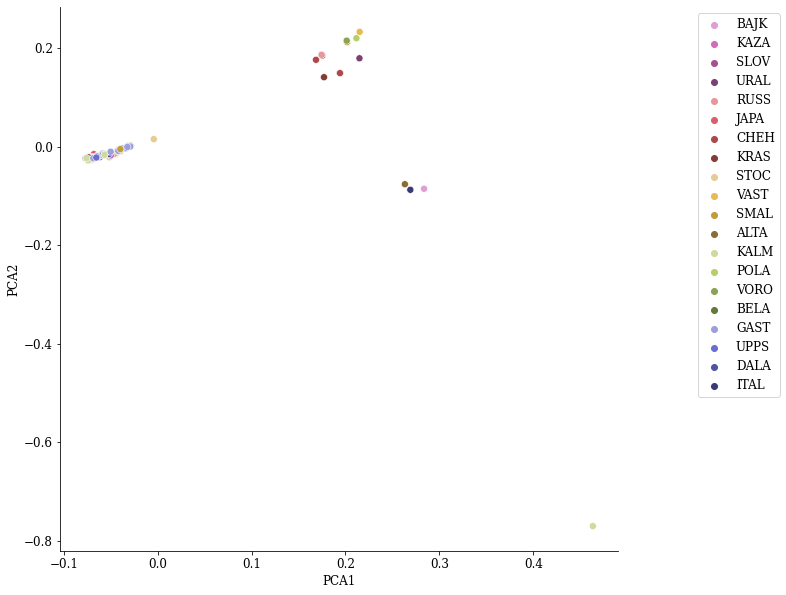

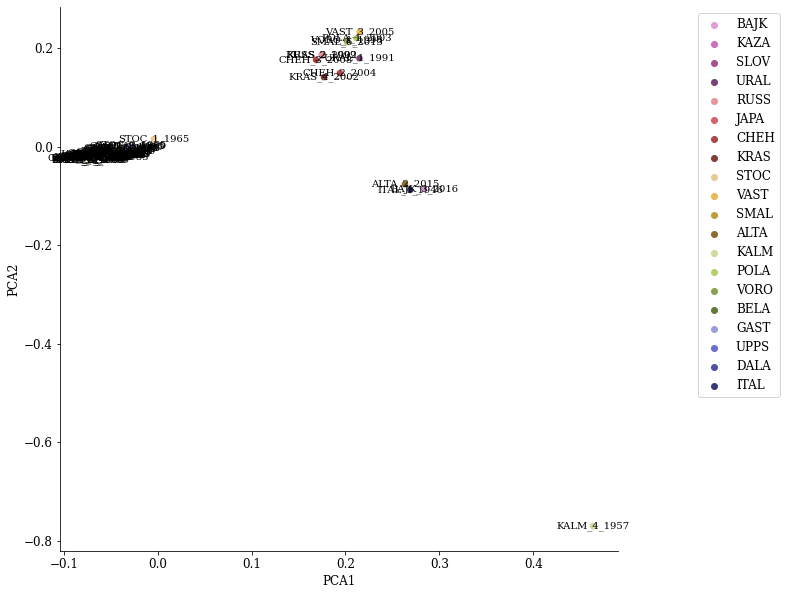

In [127]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50,palette="tab20b_r") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center',fontsize=10)


# Show the plot
plt.show()




# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50,palette="tab20b_r") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center',fontsize=10)


# Show the plot
plt.show()

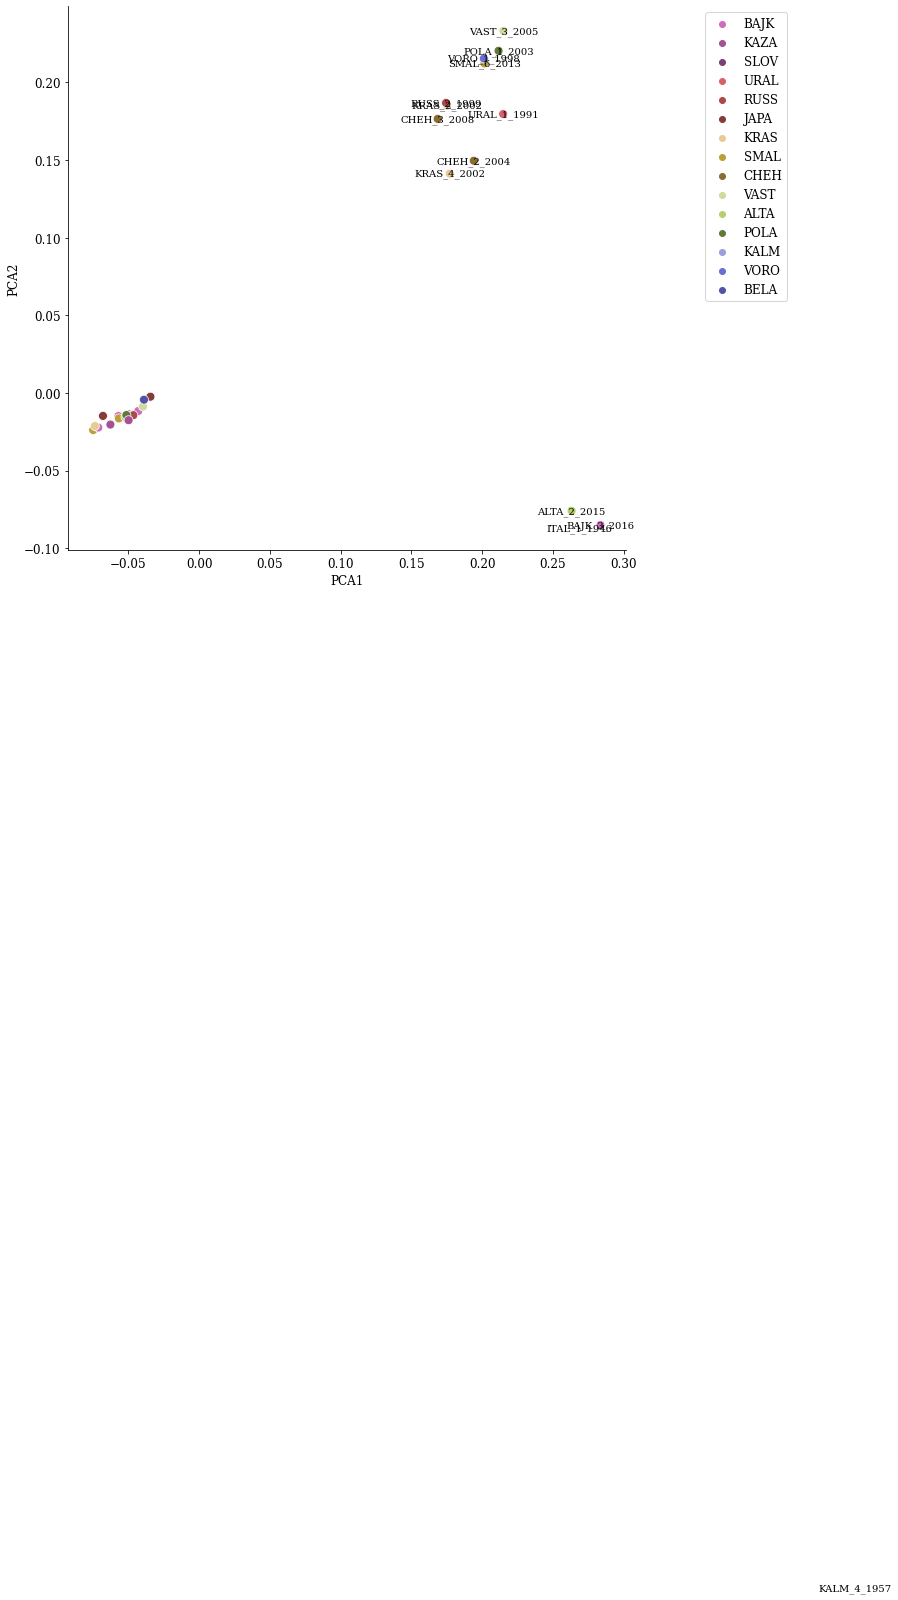

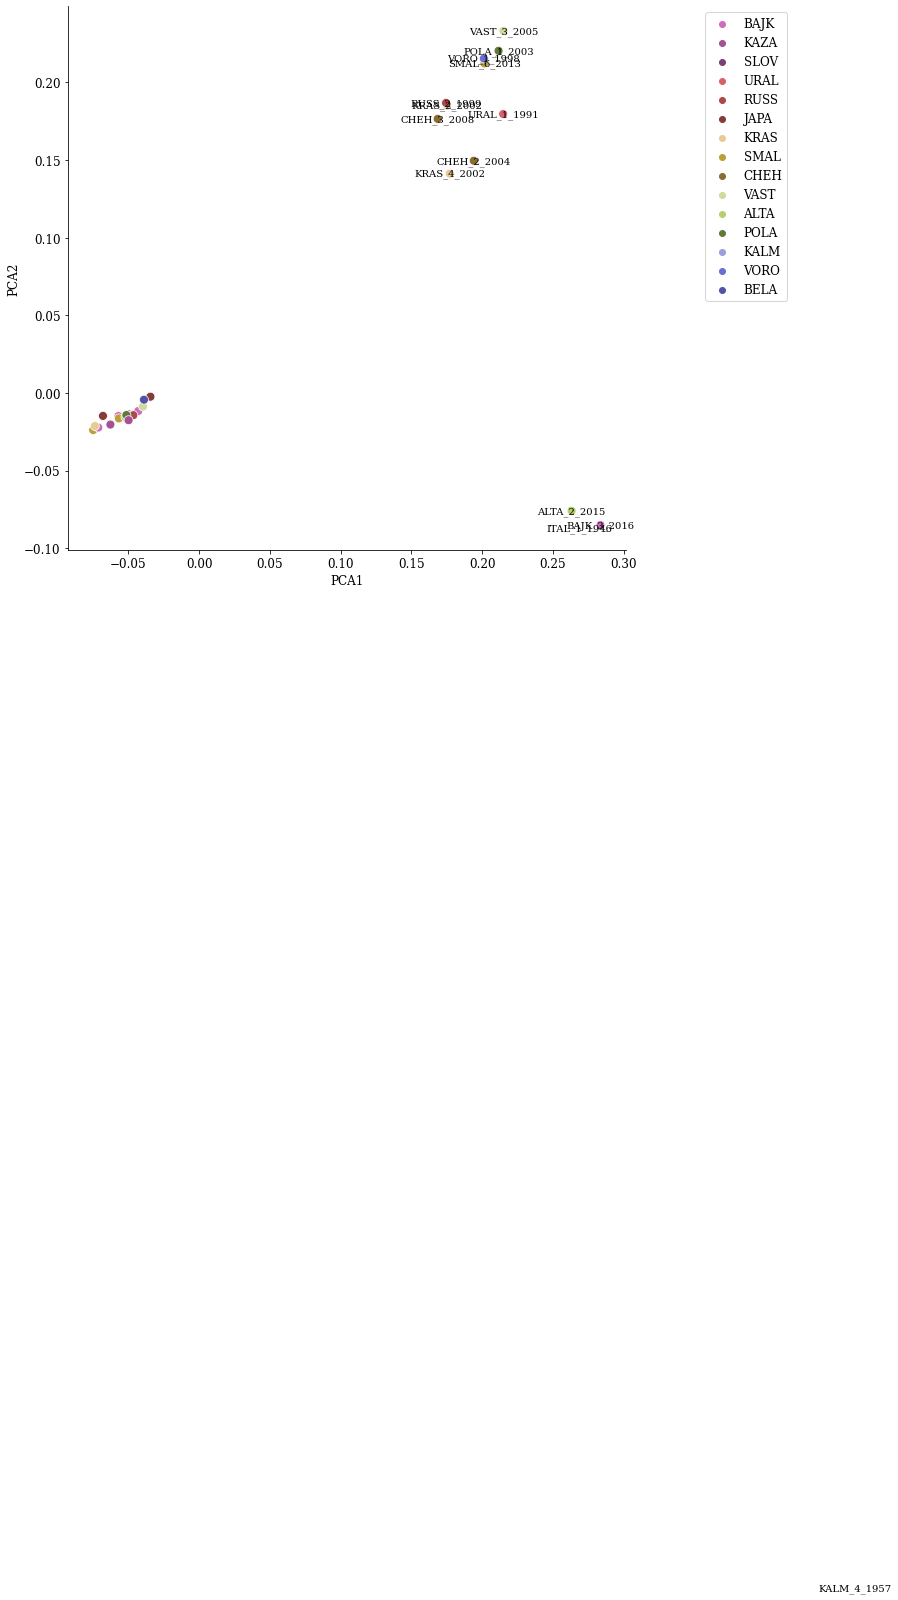

In [136]:
cont_data = df[df['Age'] == 'cont']
cont_data

# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['popID'], s=80,palette="tab20b_r") #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#for i in range(len(cont_data)):  
#    plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=14)
    
    
#for i in range(len(cont_data)):
#    plt.text(cont_data['PCA1'].iloc[i], cont_data['PCA2'].iloc[i], cont_data['ID'].iloc[i], ha='center', va='center', fontsize=14)

for i in range(len(df)):
    if df['PCA1'][i] > 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)    

        
#plt.legend(frameon=False)
#plt.savefig("/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_cont_miss3_auto.pdf",bbox_inches="tight")
        
# Show the plot
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['popID'], s=80,palette="tab20b_r") #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

for i in range(len(df)):
    if df['PCA1'][i] > 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)    
        
# Show the plot
plt.show()

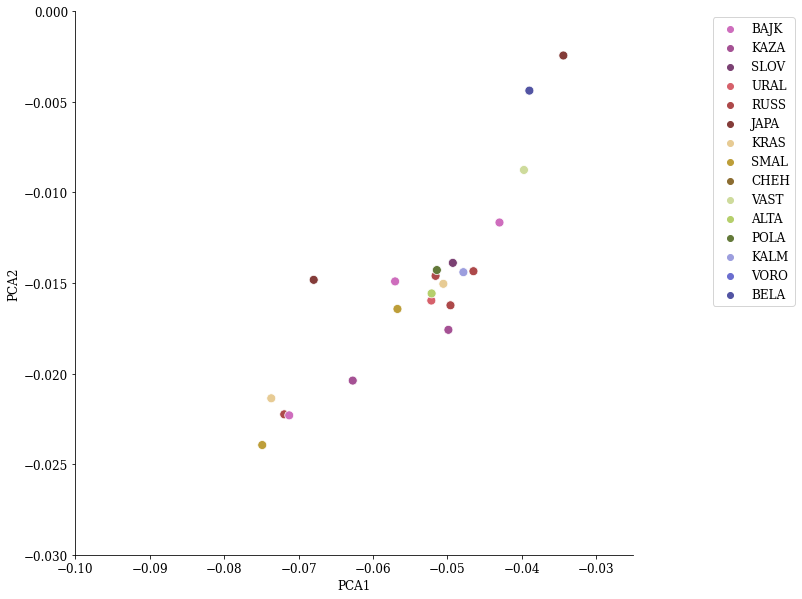

In [143]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['popID'], s=80,palette="tab20b_r") #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#for i in range(len(df)):
#    if cont_data['PCA1'][i] < -0.03:       
#        plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=10) 
        
plt.xlim(-0.1,-0.025)
plt.ylim(-0.03,0)
        
# Show the plot
plt.show()

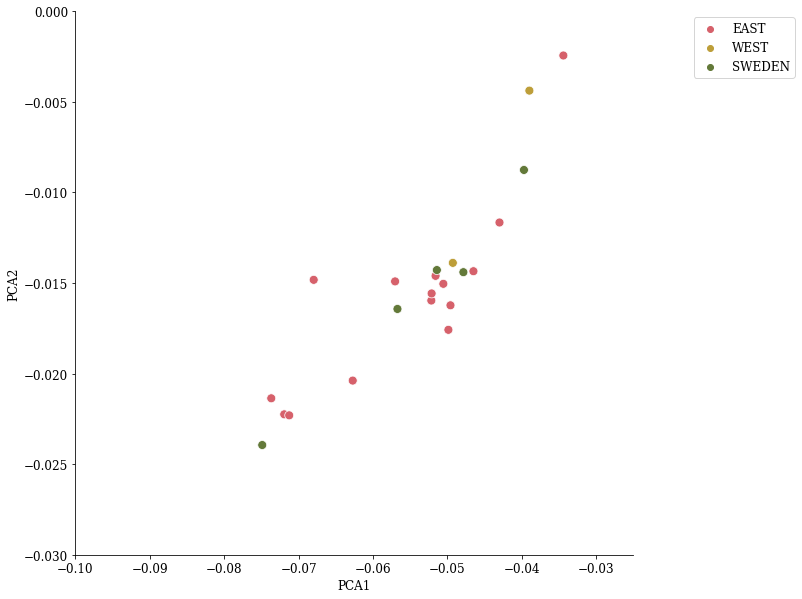

In [144]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['Category'], s=80,palette="tab20b_r") #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#for i in range(len(df)):
#    if cont_data['PCA1'][i] < -0.03:       
#        plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=10) 
        
plt.xlim(-0.1,-0.025)
plt.ylim(-0.03,0)
        
# Show the plot
plt.show()

#### w/o prunning

In [29]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.noprune.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,ID,popID
0,BAJK_1_2016_BAJK_1_2016,-0.021607,-0.038400,0.036554,-0.003799,0.003191,0.000666,0.046892,-0.003607,0.001302,...,-0.006429,0.017833,-0.003404,-0.022345,0.011039,-0.007339,0.014178,-0.034471,BAJK_1_2016,BAJK
1,KAZA_1_2006_KAZA_1_2006,-0.022329,-0.040539,0.039715,-0.004198,0.002507,0.000116,0.051488,-0.003200,0.003027,...,-0.006210,0.019674,-0.007971,-0.023226,0.007635,-0.007053,0.014741,-0.043834,KAZA_1_2006,KAZA
2,SLOV_1_1990_SLOV_1_1990,-0.022281,-0.039101,0.041636,-0.011949,0.009736,-0.015449,-0.237306,0.001947,0.000508,...,0.111743,0.015038,0.003101,0.007158,0.009001,-0.003247,0.093762,-0.359621,SLOV_1_1990,SLOV
3,URAL_2_1995_URAL_2_1995,-0.022180,-0.038755,0.042506,-0.013505,0.009991,-0.014730,-0.235125,0.005888,-0.001293,...,0.165363,-0.031490,-0.002269,-0.007121,0.037753,-0.004138,-0.030278,0.275367,URAL_2_1995,URAL
4,RUSS_4_2008_RUSS_4_2008,-0.023914,-0.043860,0.044926,-0.006175,0.005110,-0.001553,0.036422,-0.004357,0.003251,...,-0.009818,0.032289,-0.006651,-0.038370,0.015236,-0.016709,0.039454,-0.082321,RUSS_4_2008,RUSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KALM_4_1957_KALM_4_1957,0.979577,-0.157465,0.035402,-0.004383,0.020435,0.003769,0.000486,-0.001940,0.000899,...,0.002099,-0.000446,-0.000297,-0.000001,0.000192,-0.000832,0.000751,-0.001182,KALM_4_1957,KALM
69,GAST_3_1941_GAST_3_1941,-0.022792,-0.041566,0.039905,-0.002461,0.000977,0.002713,0.090805,-0.003121,0.003860,...,0.016726,-0.007306,-0.006479,0.002439,-0.003439,-0.009633,0.015295,-0.025869,GAST_3_1941,GAST
70,ITAL_1_1946_ITAL_1_1946,0.050310,0.283125,0.025682,0.047707,-0.947306,0.004173,-0.033884,-0.038887,0.004160,...,0.004160,0.001284,-0.002327,-0.003282,0.000978,-0.002683,0.004417,-0.005592,ITAL_1_1946,ITAL
71,GAST_5_1943_GAST_5_1943,-0.022337,-0.040611,0.036886,-0.001057,-0.000250,0.004281,0.103352,-0.005421,0.002291,...,0.023518,-0.018955,-0.001493,0.023375,-0.008213,-0.002420,-0.001249,0.010981,GAST_5_1943,GAST


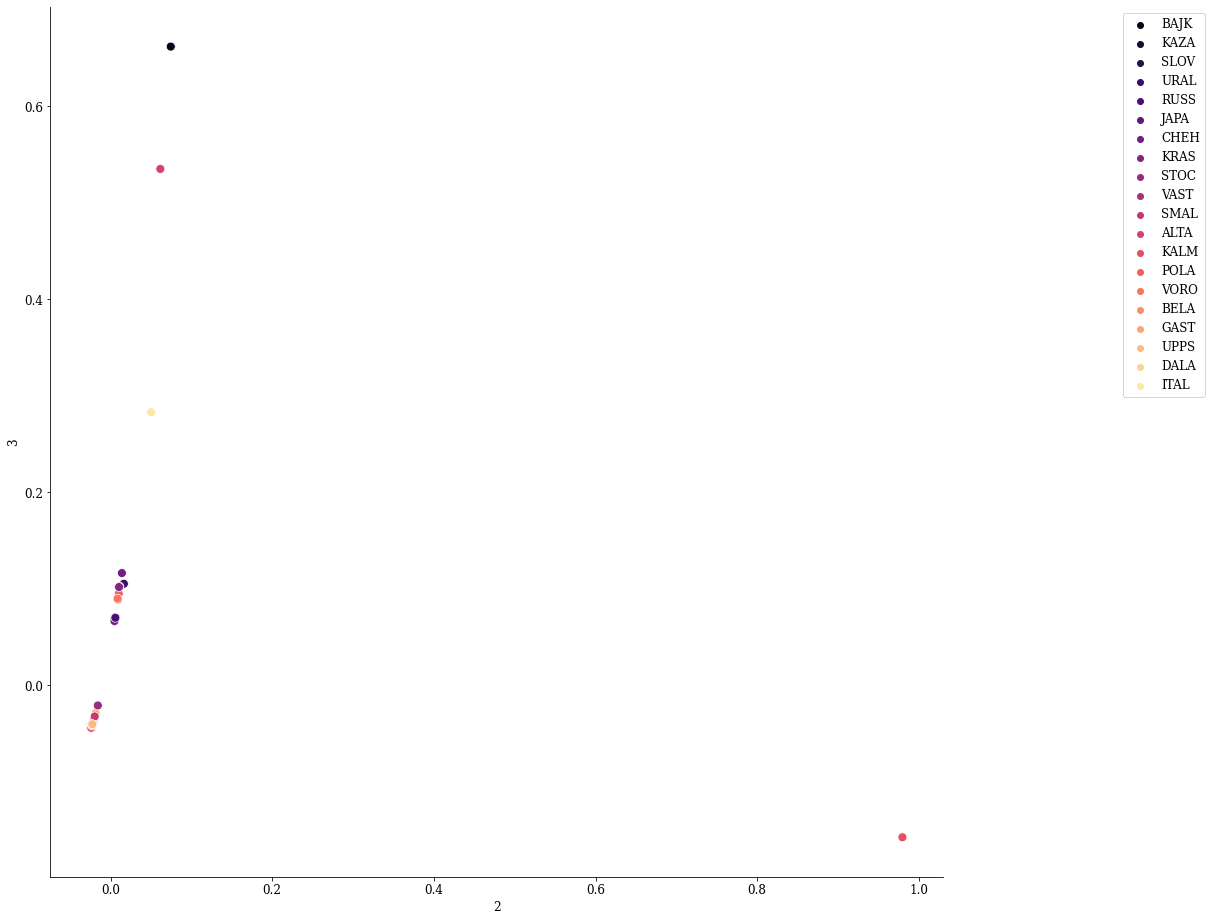

In [31]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=80,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

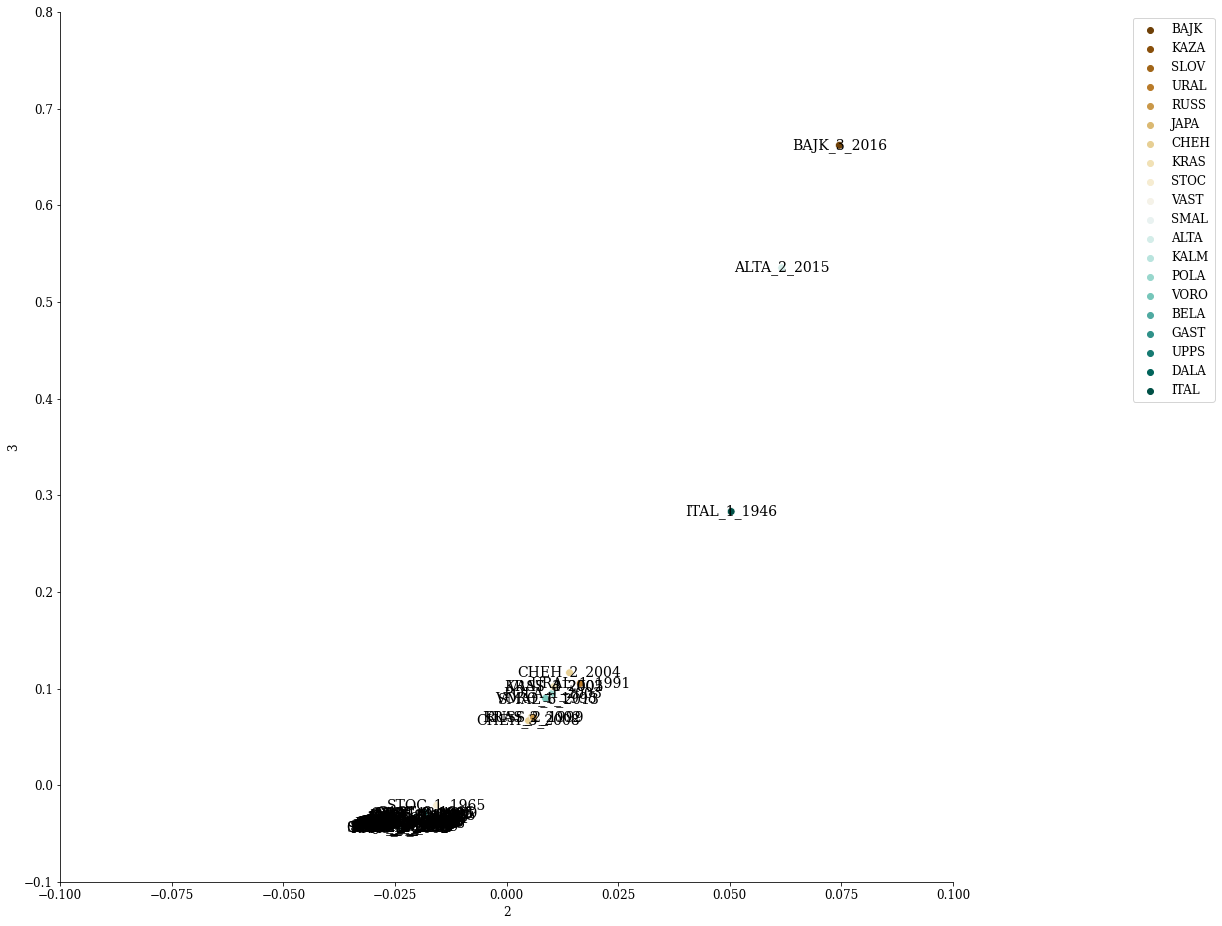

In [33]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=60,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.8)
for i in range(len(df)):
    if df[2][i] < 0.1:
        plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center', fontsize=14)
    
plt.show()

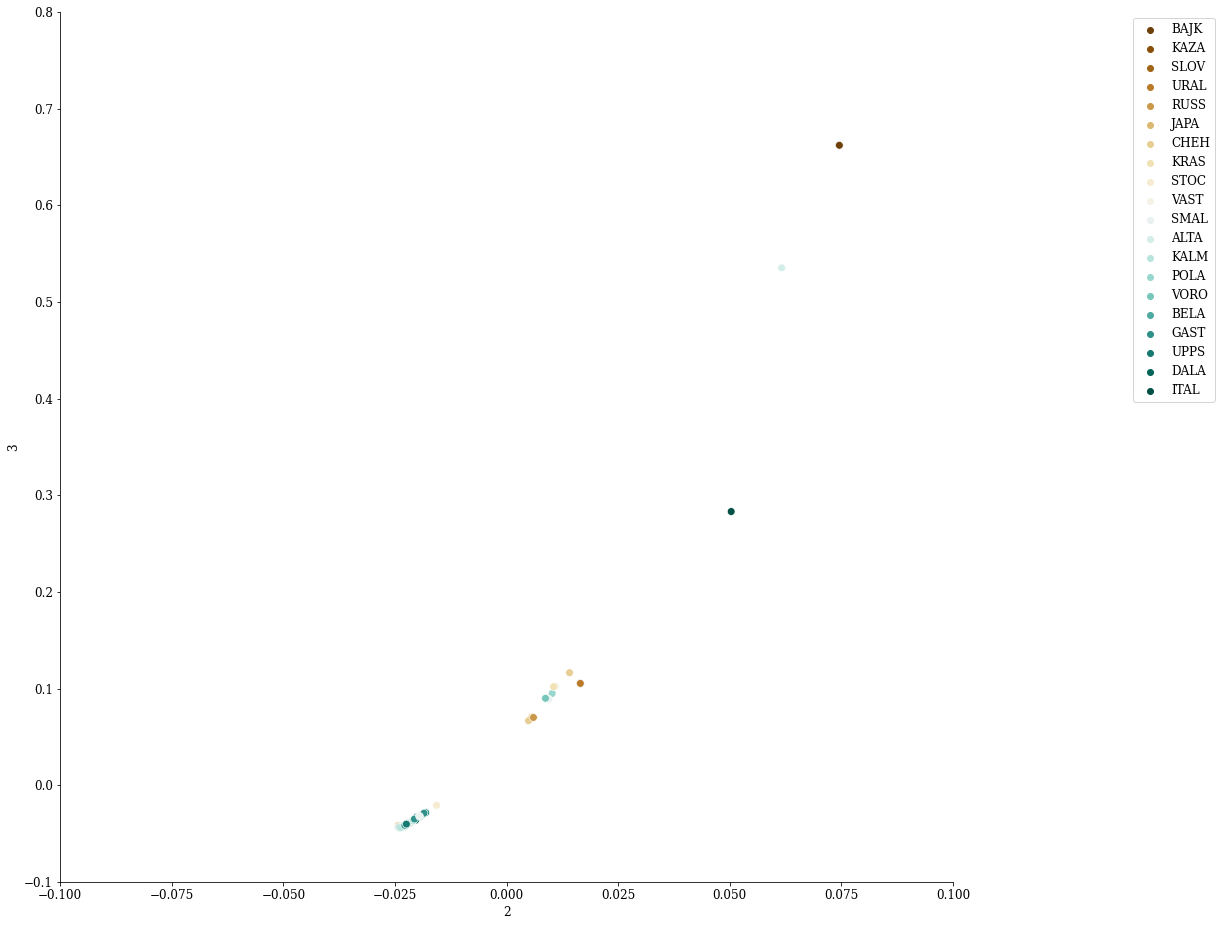

In [34]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=60,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.8)
#for i in range(len(df)):
#    if df[2][i] < 0.1:
#        plt.text(df[2][i], df[3][i], df['ID'][i], ha='center', va='center', fontsize=14)
    
plt.show()

### miss20

#### pruned

In [2]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss20.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,ID,popID
0,BAJK_1_2016_BAJK_1_2016,-0.065484,-0.000880,-0.051408,-0.036077,0.017175,0.012470,0.005862,0.012934,-0.008651,...,0.003877,0.146554,-0.020154,0.011742,0.085141,-0.012962,0.000419,0.023468,BAJK_1_2016,BAJK
1,KAZA_1_2006_KAZA_1_2006,-0.071009,-0.002774,-0.054913,-0.037967,0.018390,0.016598,0.009504,0.019736,-0.009173,...,0.006368,0.200449,-0.029309,0.018029,0.114191,-0.017339,0.000973,0.030681,KAZA_1_2006,KAZA
2,SLOV_1_1990_SLOV_1_1990,-0.059085,-0.032594,0.187884,0.132751,-0.060703,-0.011963,-0.008197,-0.148635,-0.032952,...,-0.002195,0.179281,0.117884,-0.750241,-0.280879,-0.441026,-0.023138,0.075672,SLOV_1_1990,SLOV
3,URAL_2_1995_URAL_2_1995,-0.054745,-0.028753,0.174404,0.123287,-0.057473,-0.015103,-0.011880,-0.214190,-0.045517,...,0.003457,-0.076507,-0.031761,0.187045,0.040363,-0.041425,-0.122991,0.373872,URAL_2_1995,URAL
4,RUSS_4_2008_RUSS_4_2008,-0.078534,-0.005518,-0.046994,-0.034117,0.018024,0.023592,0.012632,0.033834,-0.012505,...,0.007195,0.281592,-0.040521,0.023267,0.155848,-0.021328,0.001796,0.039637,RUSS_4_2008,RUSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KALM_4_1957_KALM_4_1957,0.317591,-0.564413,-0.476783,0.573775,0.042471,0.076819,-0.020387,-0.007039,0.000672,...,0.000159,0.005640,-0.001264,0.001175,-0.000230,-0.000319,0.000691,-0.000818,KALM_4_1957,KALM
69,GAST_3_1941_GAST_3_1941,-0.064753,0.001886,-0.075042,-0.051006,0.022479,0.009122,0.004132,-0.014757,0.011310,...,0.001511,0.009972,-0.005402,0.003264,-0.005669,0.003177,-0.002207,-0.003416,GAST_3_1941,GAST
70,ITAL_1_1946_ITAL_1_1946,0.205541,-0.208961,0.033410,-0.195269,-0.028559,-0.920847,-0.076755,0.037369,-0.005350,...,0.003575,0.052993,-0.007990,0.006023,0.016146,-0.003121,-0.000043,0.002142,ITAL_1_1946,ITAL
71,GAST_5_1943_GAST_5_1943,-0.063599,0.005297,-0.085498,-0.056019,0.023562,0.004912,0.002060,-0.032629,0.019260,...,-0.001449,-0.081193,0.010282,-0.006406,-0.056900,0.009970,-0.002147,-0.017574,GAST_5_1943,GAST


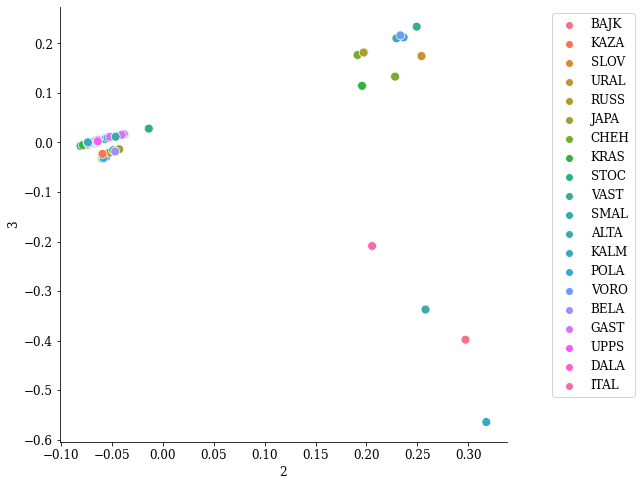

In [10]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df[2], y=df[3], hue=df['popID'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

## mtDNA

In [8]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.mtDNA.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})


df

,1,PCA1,PCA2,4,5,6,7,8,9,10,...,17,18,19,20,21,ID,popID,Category,Year,Decade
0,BAJK_1_2016_BAJK_1_2016,-0.038360,-0.044800,0.010885,0.010552,0.000078,-0.000800,-0.004507,-0.004617,-0.225413,...,-0.005536,0.002244,-0.005381,-0.003972,-0.011678,BAJK_1_2016,BAJK,EAST,2016,2010s
1,KAZA_1_2006_KAZA_1_2006,-0.038934,-0.047468,0.011151,0.010687,0.000870,-0.002071,-0.003911,-0.006228,-0.256613,...,-0.001498,0.013305,-0.016329,0.005053,-0.018674,KAZA_1_2006,KAZA,EAST,2006,2000s
2,SLOV_1_1990_SLOV_1_1990,-0.037526,-0.045732,0.012103,0.006571,0.000474,-0.000614,0.015114,-0.007943,0.040745,...,-0.016281,0.016860,0.259702,-0.030748,-0.076878,SLOV_1_1990,SLOV,WEST,1990,1990s
3,URAL_2_1995_URAL_2_1995,-0.036944,-0.048646,0.015367,0.011326,0.001602,-0.001538,0.024718,-0.004027,0.031850,...,-0.010828,0.023941,0.209988,-0.025518,0.000365,URAL_2_1995,URAL,EAST,1995,1990s
4,RUSS_4_2008_RUSS_4_2008,-0.039602,-0.046787,0.011308,0.010554,0.000742,-0.001932,-0.004253,-0.006430,-0.252715,...,-0.000974,0.011622,-0.013801,0.006497,-0.016397,RUSS_4_2008,RUSS,EAST,2008,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KALM_4_1957_KALM_4_1957,0.877463,-0.452337,-0.107324,0.007309,0.006391,0.002715,0.003897,0.003995,-0.002665,...,-0.000765,0.000807,-0.000639,0.000167,0.000974,KALM_4_1957,KALM,SWEDEN,1957,1950s
69,GAST_3_1941_GAST_3_1941,-0.039663,-0.048751,0.012761,0.012156,-0.000541,-0.001609,0.047924,-0.003565,0.100495,...,-0.002870,0.003489,-0.018731,0.003575,0.019397,GAST_3_1941,GAST,SWEDEN,1941,1940s
70,ITAL_1_1946_ITAL_1_1946,0.193685,0.299507,0.437553,0.084167,0.037177,-0.811619,0.004921,0.013096,-0.000191,...,0.001093,-0.000110,0.001097,-0.000846,0.001145,ITAL_1_1946,ITAL,WEST,1946,1940s
71,GAST_5_1943_GAST_5_1943,-0.039480,-0.048414,0.012616,0.011502,-0.000505,-0.001462,0.043215,-0.003267,0.090761,...,0.000158,-0.001919,-0.016325,0.003129,0.008545,GAST_5_1943,GAST,SWEDEN,1943,1940s


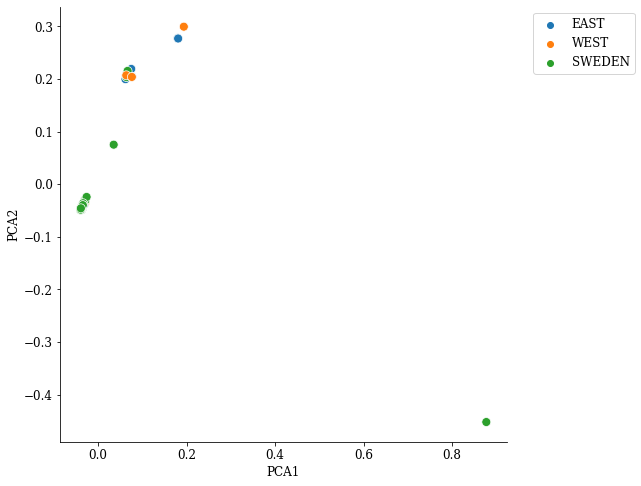

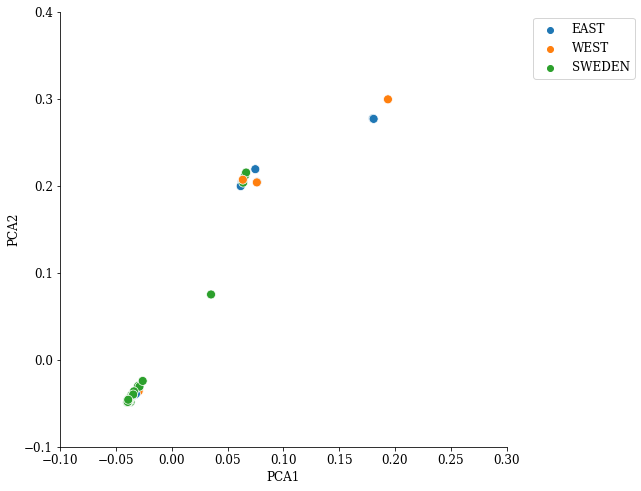

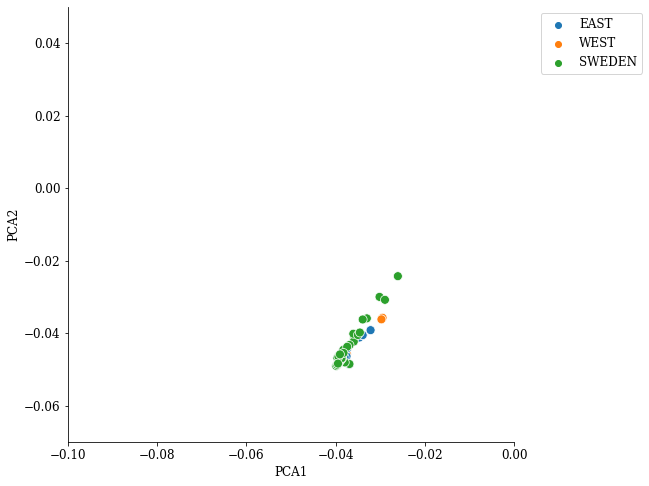

In [16]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0.3)
plt.ylim(-0.1,0.4)
plt.show()


sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0.0)
plt.ylim(-0.07,0.05)
plt.show()

#### sweden

In [8]:
import pandas as pd
import re

# Read the data from the file
#df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.mtDNA.eigenvec", delimiter=' ', header=None)
df = pd.read_csv("/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.mtDNA.sweden.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})


df

,1,PCA1,PCA2,4,5,6,7,8,9,10,...,17,18,19,20,21,ID,popID,Category,Year,Decade
0,STOC_6_1965_STOC_6_1965,0.033609,-0.036993,0.008816,0.289296,-0.009345,-0.082857,-0.063043,-0.005537,-0.007055,...,0.001018,0.240504,0.066768,-0.047145,0.003755,STOC_6_1965,STOC,SWEDEN,1965,1960s
1,VAST_1_1983_VAST_1_1983,0.026072,-0.022169,-0.006038,0.141976,0.129502,0.935116,-0.247230,0.025541,-0.019291,...,-0.006960,0.000483,-0.003667,-0.007424,-0.003579,VAST_1_1983,VAST,SWEDEN,1983,1980s
2,SMAL_4_1996_SMAL_4_1996,0.033754,-0.037640,0.010623,0.308735,-0.010469,-0.093078,-0.074508,-0.008241,-0.008276,...,-0.037447,-0.407183,-0.130667,0.055222,-0.007156,SMAL_4_1996,SMAL,SWEDEN,1996,1990s
3,SMAL_5_1998_SMAL_5_1998,0.033516,-0.037065,0.010405,0.280594,-0.009363,-0.082637,-0.063670,-0.006424,-0.003478,...,-0.001096,0.138482,0.039618,-0.029757,-0.005669,SMAL_5_1998,SMAL,SWEDEN,1998,1990s
4,VAST_3_2005_VAST_3_2005,-0.109335,0.635593,0.223801,0.006084,-0.707656,0.087912,-0.009868,0.032178,-0.020141,...,0.002745,-0.004086,0.006504,-0.004412,0.005394,VAST_3_2005,VAST,SWEDEN,2005,2000s
5,KALM_9_1981_KALM_9_1981,0.030774,-0.034309,0.004313,0.106527,0.002506,0.111525,0.541024,0.011630,-0.008041,...,0.032107,-0.008859,-0.014888,0.019537,-0.038279,KALM_9_1981,KALM,SWEDEN,1981,1980s
6,KALM_1_2018_KALM_1_2018,0.030261,-0.042654,0.010700,-0.007616,0.001200,0.010493,0.027019,0.032148,0.399737,...,-0.010740,0.005344,0.013920,0.018085,-0.025436,KALM_1_2018,KALM,SWEDEN,2018,2010s
7,SMAL_6_2013_SMAL_6_2013,-0.108593,0.648000,0.228684,0.005009,0.693444,-0.098917,0.013584,0.037621,0.007882,...,0.004613,-0.002988,0.002301,-0.005861,0.004825,SMAL_6_2013,SMAL,SWEDEN,2013,2010s
8,KALM_10_1983_KALM_10_1983,0.029888,-0.035554,0.004966,0.114469,0.010517,0.145774,0.770144,0.015289,-0.067213,...,-0.012114,0.001537,0.002843,-0.002917,0.027830,KALM_10_1983,KALM,SWEDEN,1983,1980s
9,VAST_2_1999_VAST_2_1999,-0.051788,0.286488,-0.943815,-0.012950,-0.002279,-0.022268,-0.004425,0.015916,0.003951,...,-0.003528,-0.001399,-0.002394,-0.001779,0.000029,VAST_2_1999,VAST,SWEDEN,1999,1990s


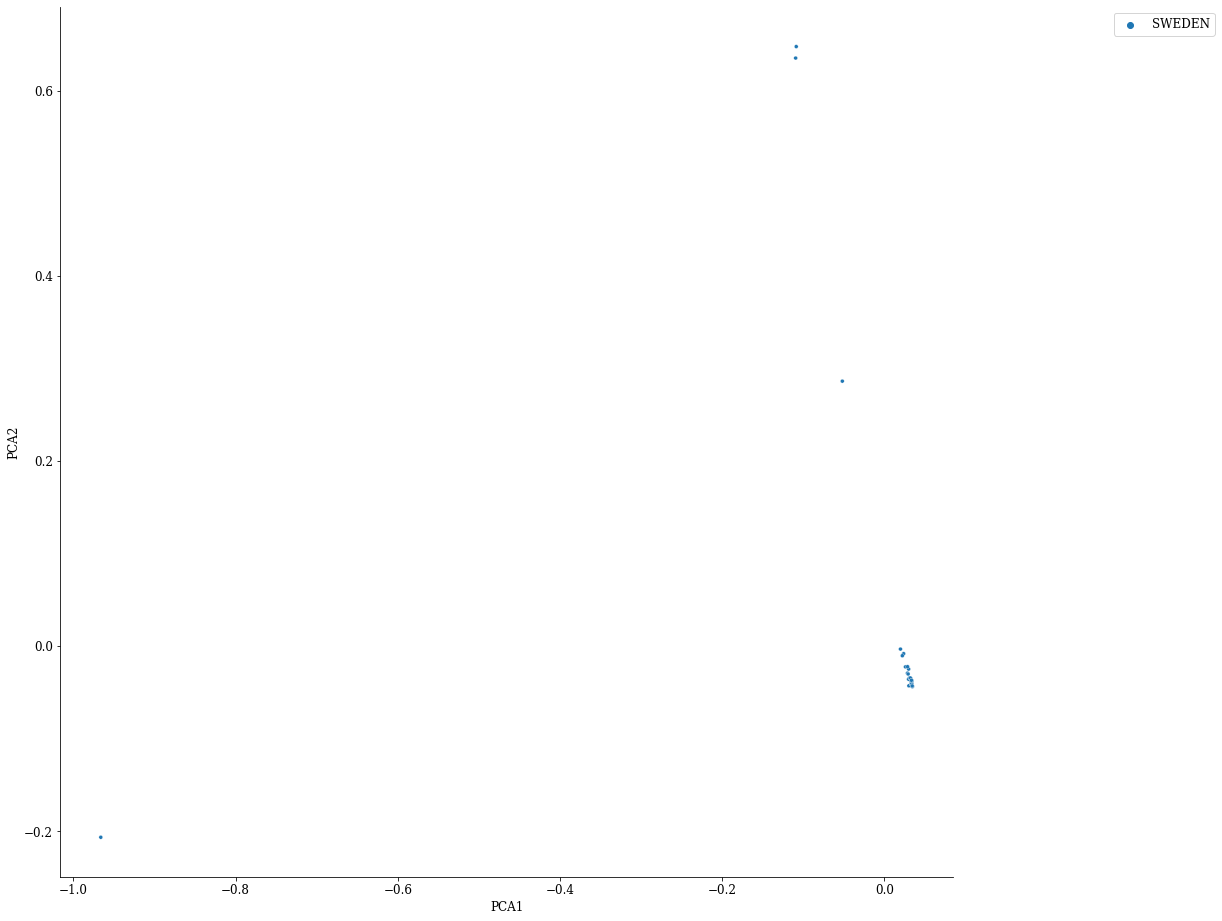

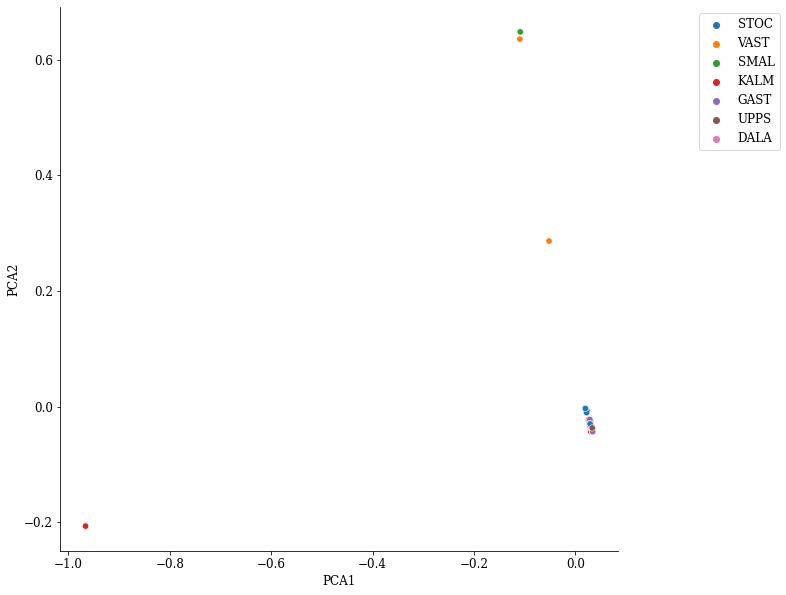

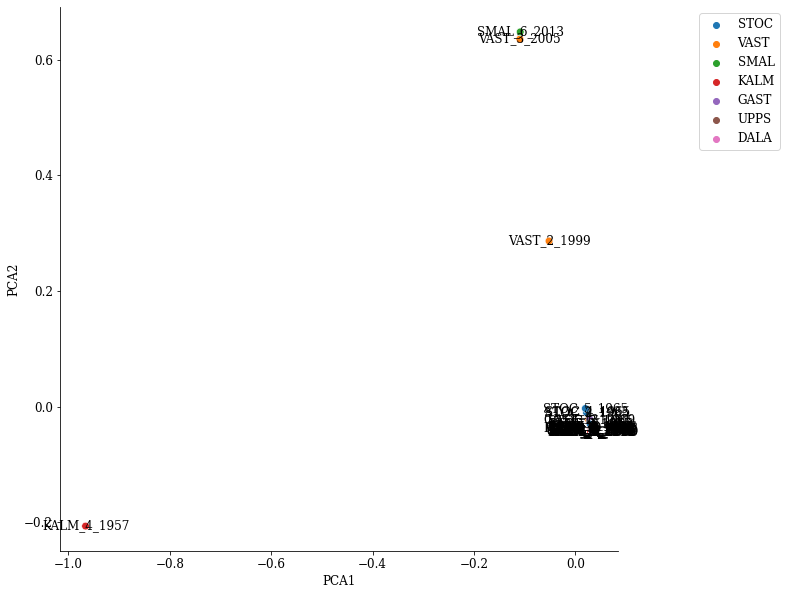

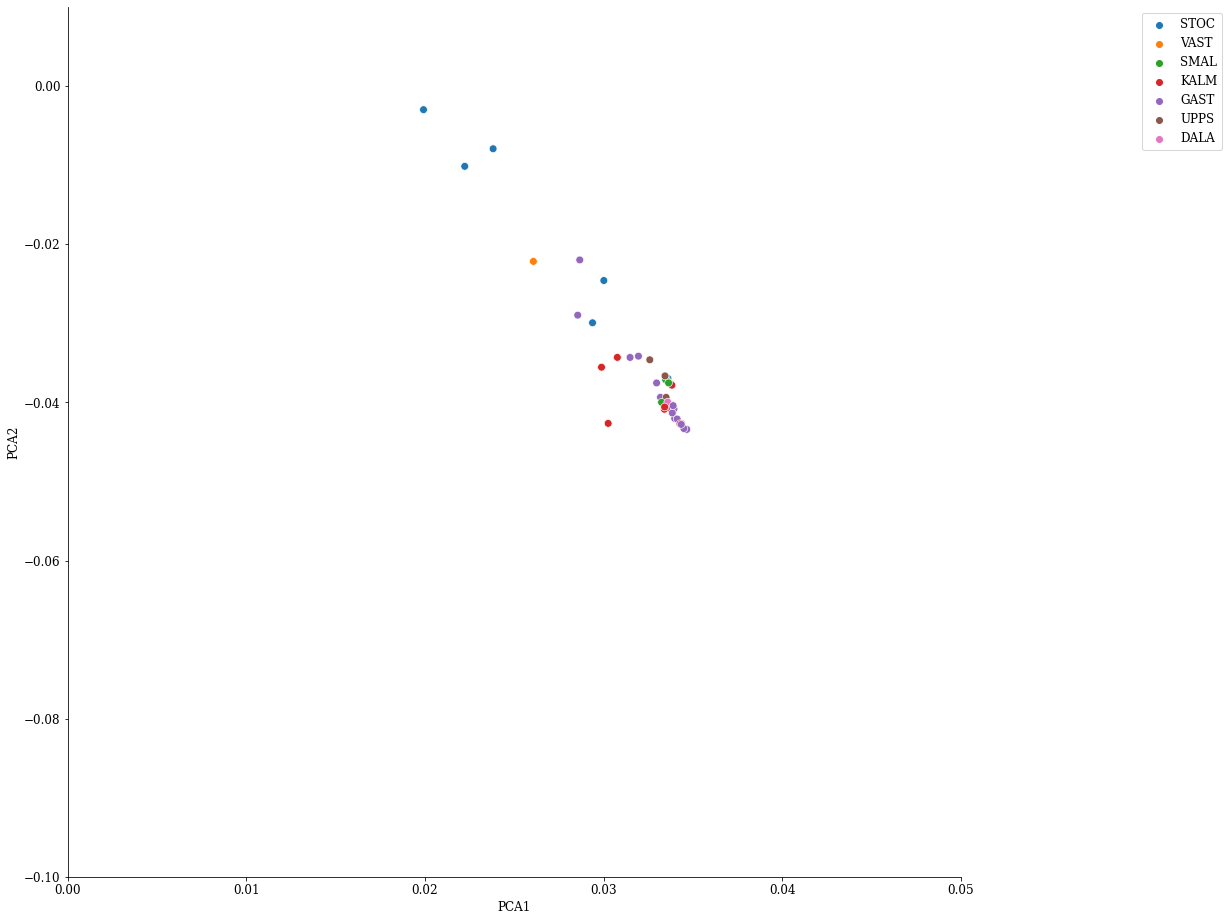

In [24]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=15) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()



# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.xlim(-0.1,0.1)
#plt.ylim(-0.1,0.8)
#for i in range(len(df)):
#    if df[2][i] < 0.1:
#        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')
    
plt.show()


# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.1,0.01)
#for i in range(len(df)):
#    if df[2][i] < 0.1:
#        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')
    
plt.show()

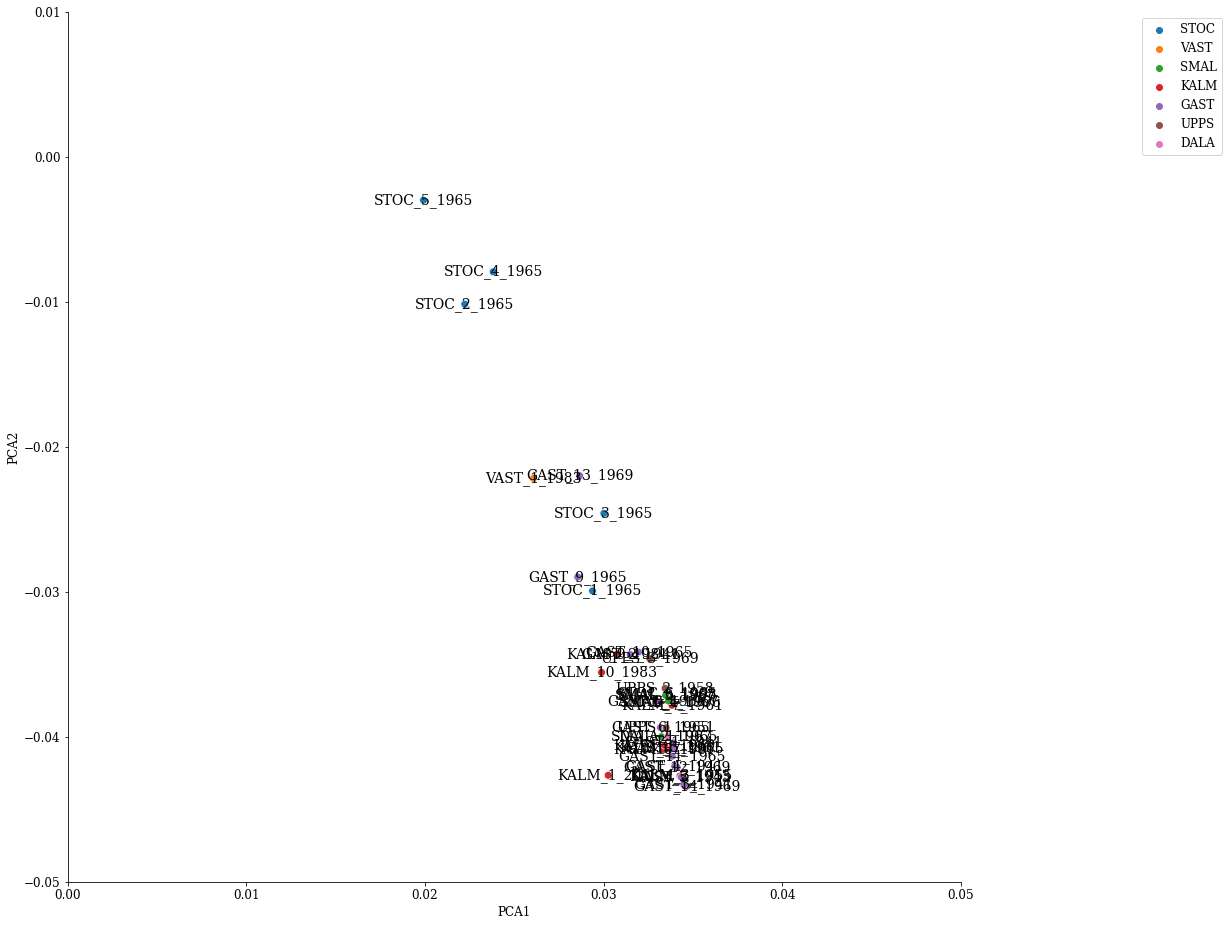

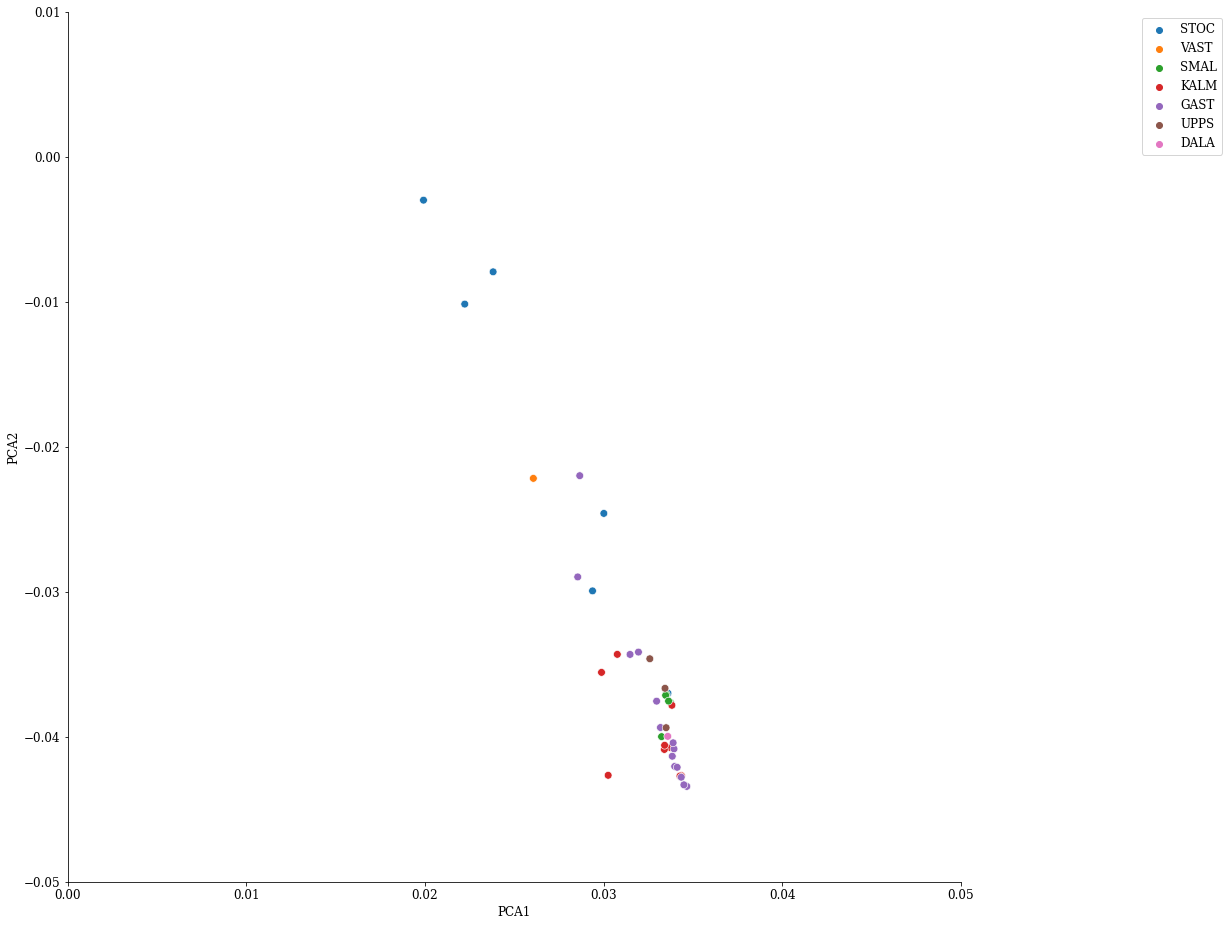

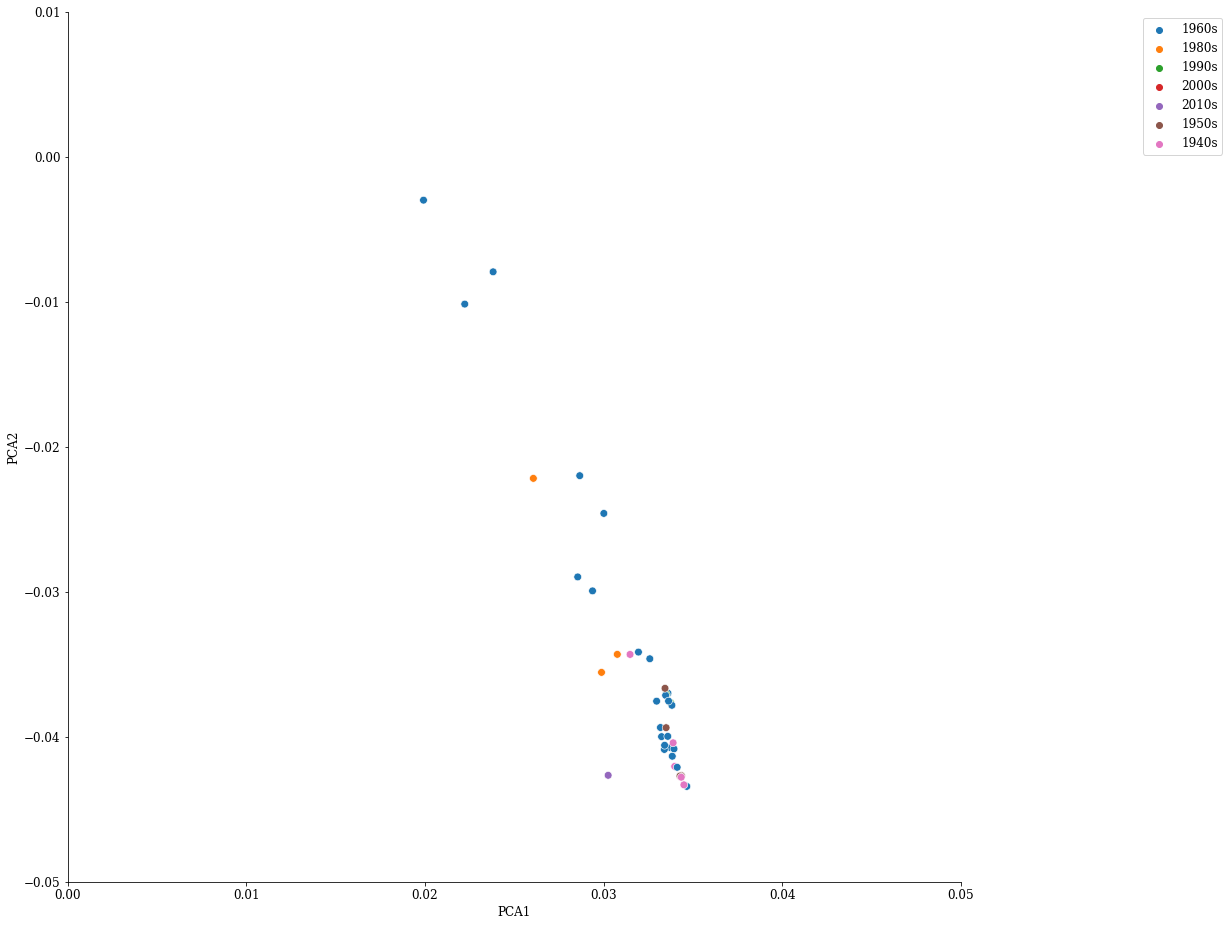

In [36]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.05,0.01)
for i in range(len(df)):
    if df['PCA1'][i] > 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i]) #, ha='center', va='center')
    
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.05,0.01)
#for i in range(len(df)):
#    if df['PCA1'][i] > 0:       
#        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i]) #, ha='center', va='center')
    
plt.show()

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Decade'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.05,0.01)
    
plt.show()

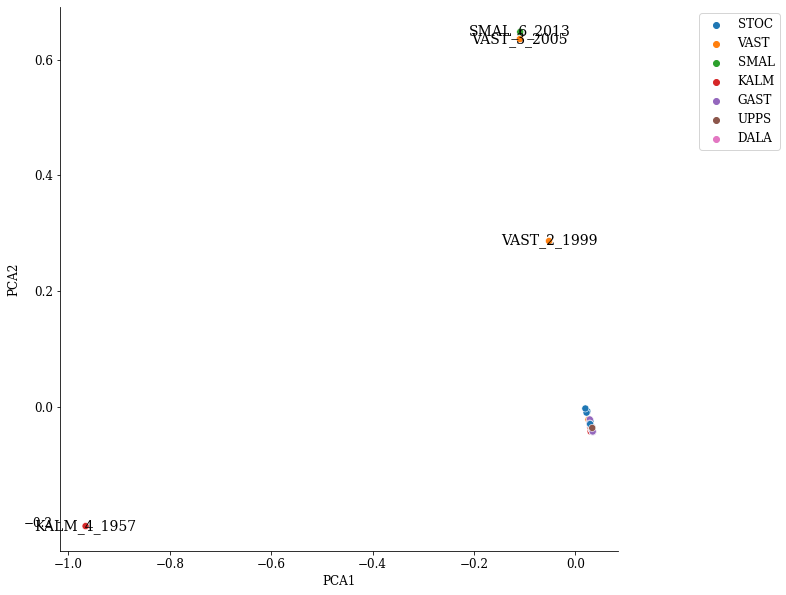

In [39]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=50) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
for i in range(len(df)):
    if df['PCA1'][i] < 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)

# Show the plot
plt.show()

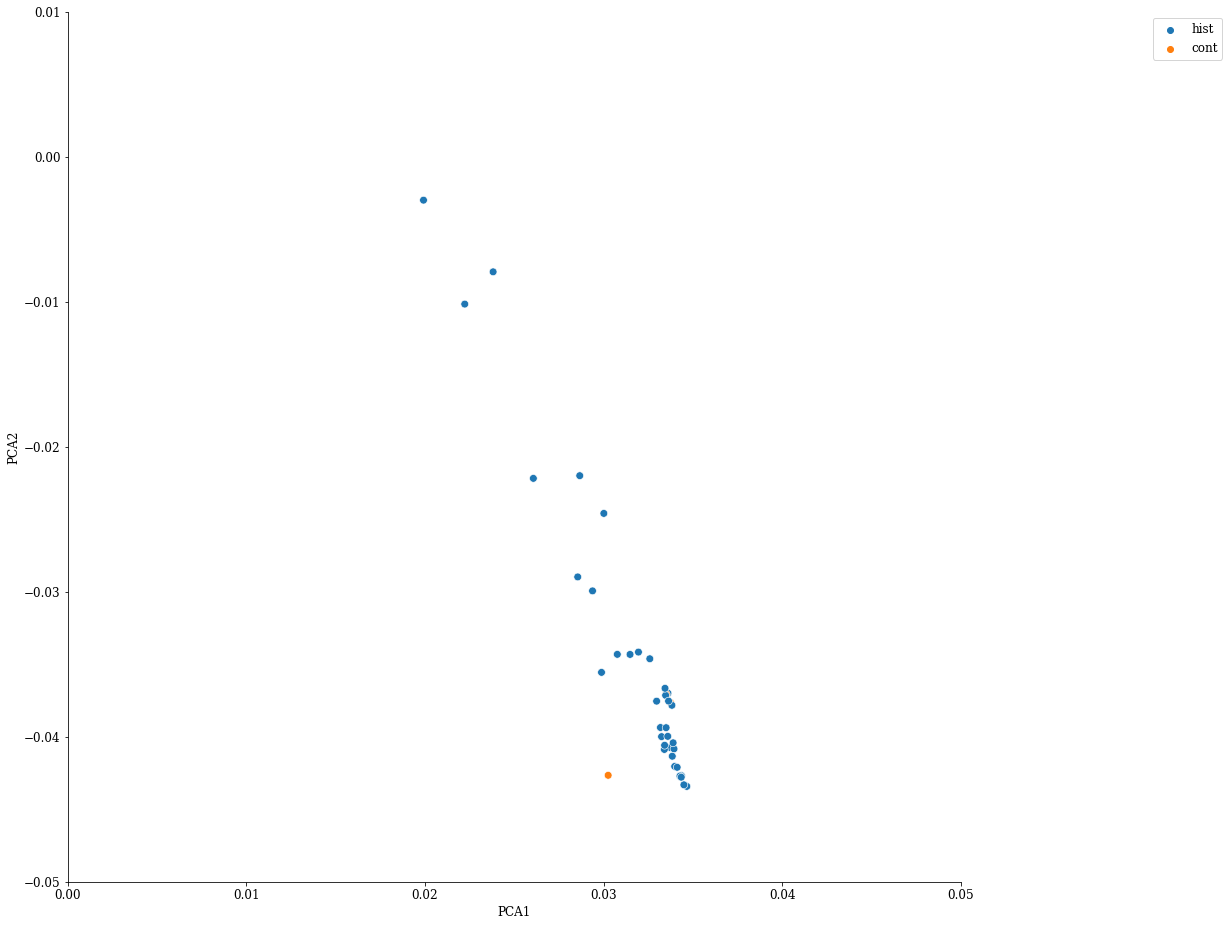

In [45]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Age'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (16.0, 16.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(0,0.05)
plt.ylim(-0.05,0.01)
    
plt.show()

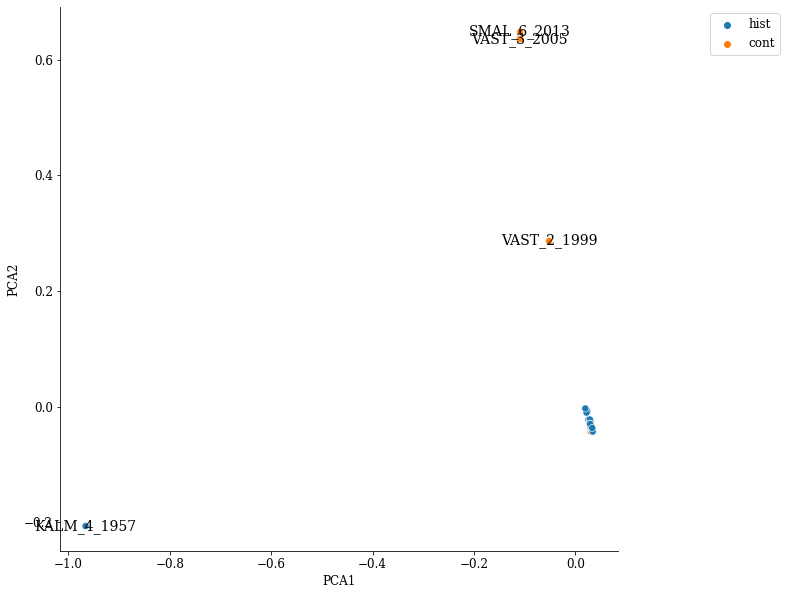

In [47]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Age'], s=50) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
for i in range(len(df)):
    if df['PCA1'][i] < 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)

# Show the plot
plt.show()

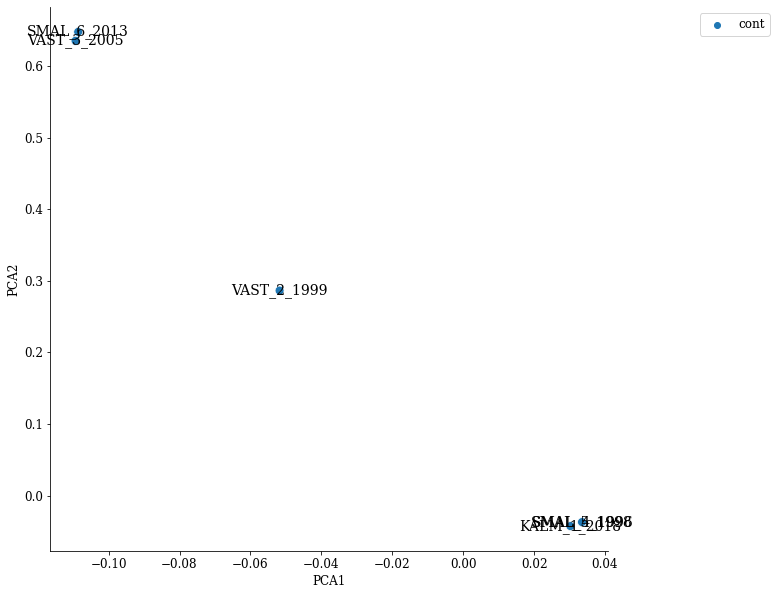

In [69]:
cont_data = df[df['Age'] == 'cont']
cont_data

# Plot scatterplot with the custom palette
sns.scatterplot(x=cont_data['PCA1'], y=cont_data['PCA2'], hue=cont_data['Age'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#for i in range(len(cont_data)):  
#    plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=14)
    
    
for i in range(len(cont_data)):
    plt.text(cont_data['PCA1'].iloc[i], cont_data['PCA2'].iloc[i], cont_data['ID'].iloc[i], ha='center', va='center', fontsize=14)

#for i in range(len(df)):
#    if df['PCA1'][i] < 0:       
#        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)    

# Show the plot
plt.show()

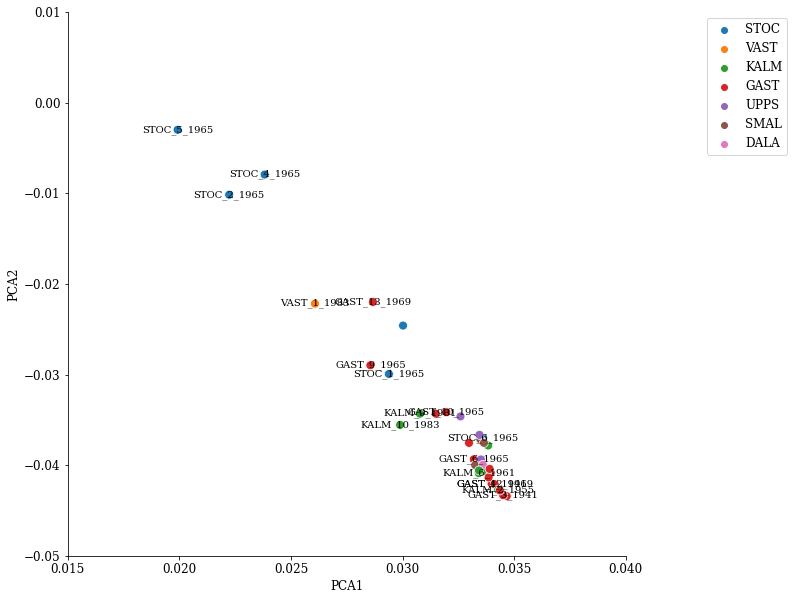

In [83]:
hist_data = df[df['Age'] == 'hist']
hist_data

# Plot scatterplot with the custom palette
sns.scatterplot(x=hist_data['PCA1'], y=hist_data['PCA2'], hue=hist_data['popID'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#for i in range(len(cont_data)):  
#    plt.text(cont_data['PCA1'][i], cont_data['PCA2'][i], cont_data['ID'][i], ha='center', va='center', fontsize=14)


plt.xlim(0.015,0.04)
plt.ylim(-0.05,0.01)


for i in range(len(df)):
    if 0.015 < df['PCA1'][i] < 0.03:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)  
    
n = 5
for i in range(0, len(df), n):
    if df['PCA1'][i] > 0:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)  

# Show the plot
plt.show()

In [60]:
cont_data

,1,PCA1,PCA2,4,5,6,7,8,9,10,...,18,19,20,21,ID,popID,Category,Year,Decade,Age
2,SMAL_4_1996_SMAL_4_1996,0.033754,-0.037640,0.010623,0.308735,-0.010469,-0.093078,-0.074508,-0.008241,-0.008276,...,-0.407183,-0.130667,0.055222,-0.007156,SMAL_4_1996,SMAL,SWEDEN,1996,1990s,cont
3,SMAL_5_1998_SMAL_5_1998,0.033516,-0.037065,0.010405,0.280594,-0.009363,-0.082637,-0.063670,-0.006424,-0.003478,...,0.138482,0.039618,-0.029757,-0.005669,SMAL_5_1998,SMAL,SWEDEN,1998,1990s,cont
4,VAST_3_2005_VAST_3_2005,-0.109335,0.635593,0.223801,0.006084,-0.707656,0.087912,-0.009868,0.032178,-0.020141,...,-0.004086,0.006504,-0.004412,0.005394,VAST_3_2005,VAST,SWEDEN,2005,2000s,cont
6,KALM_1_2018_KALM_1_2018,0.030261,-0.042654,0.010700,-0.007616,0.001200,0.010493,0.027019,0.032148,0.399737,...,0.005344,0.013920,0.018085,-0.025436,KALM_1_2018,KALM,SWEDEN,2018,2010s,cont
7,SMAL_6_2013_SMAL_6_2013,-0.108593,0.648000,0.228684,0.005009,0.693444,-0.098917,0.013584,0.037621,0.007882,...,-0.002988,0.002301,-0.005861,0.004825,SMAL_6_2013,SMAL,SWEDEN,2013,2010s,cont
9,VAST_2_1999_VAST_2_1999,-0.051788,0.286488,-0.943815,-0.012950,-0.002279,-0.022268,-0.004425,0.015916,0.003951,...,-0.001399,-0.002394,-0.001779,0.000029,VAST_2_1999,VAST,SWEDEN,1999,1990s,cont


#### sweden: autosomes

In [108]:
import pandas as pd
import re

# Read the data from the file
#df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.mtDNA.eigenvec", delimiter=' ', header=None)
df = pd.read_csv("/Users/dariashipilina/Documents/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss3.autosomes.sweden.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))


category_dict = {
'KAZA': 'EAST',
 'SLOV': 'WEST',
 'URAL': 'EAST',
 'RUSS': 'EAST',
 'BAJK': 'EAST',
 'JAPA': 'EAST',
 'CHEH': 'WEST',
 'KRAS': 'EAST',
 'STOC': 'SWEDEN',
 'VAST': 'SWEDEN',
 'SMAL': 'SWEDEN',
 'ALTA': 'EAST',
 'KALM': 'SWEDEN',
 'POLA': 'SWEDEN',
 'VORO': 'WEST',
 'BELA': 'WEST',
 'GAST': 'SWEDEN',
 'UPPS': 'SWEDEN',
 'DALA': 'SWEDEN',
 'ITAL': 'WEST'}

df['Category'] = df['popID'].map(category_dict)

df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})

# Categorization dictionary
age_dict = {
    '1940s': 'hist',
    '1950s': 'hist',
    '1960s': 'hist',
    '1980s': 'hist',
    '1990s': 'cont',
    '2000s': 'cont',
    '2010s': 'cont'
}

df['Age'] = df['Decade'].map(age_dict)


df

,1,PCA1,PCA2,4,5,6,7,8,9,10,...,18,19,20,21,ID,popID,Category,Year,Decade,Age
0,STOC_6_1965_STOC_6_1965,0.028591,-0.040801,0.007618,-0.034684,0.022841,-0.007998,0.003577,-0.099623,0.312989,...,0.013159,-0.034637,-0.000392,-0.005520,STOC_6_1965,STOC,SWEDEN,1965,1960s,hist
1,VAST_1_1983_VAST_1_1983,0.024031,-0.028087,0.006467,-0.463288,0.198638,-0.710065,-0.424313,0.180681,-0.055677,...,-0.004134,0.001558,0.000505,-0.001346,VAST_1_1983,VAST,SWEDEN,1983,1980s,hist
2,SMAL_4_1996_SMAL_4_1996,0.028799,-0.041919,0.007797,-0.042992,0.022304,-0.016055,0.017637,-0.107509,0.387836,...,0.108012,-0.087426,0.012117,-0.013217,SMAL_4_1996,SMAL,SWEDEN,1996,1990s,cont
3,SMAL_5_1998_SMAL_5_1998,0.026057,-0.035126,0.003817,0.012408,0.004640,-0.005046,0.006308,-0.037729,0.117032,...,0.321469,-0.154811,-0.036926,0.035741,SMAL_5_1998,SMAL,SWEDEN,1998,1990s,cont
4,VAST_3_2005_VAST_3_2005,-0.025370,0.767504,0.621380,0.009461,0.002056,-0.000158,0.000407,-0.000333,0.023765,...,-0.001228,0.000908,-0.002022,0.001217,VAST_3_2005,VAST,SWEDEN,2005,2000s,cont
5,KALM_9_1981_KALM_9_1981,0.025225,-0.032546,0.011869,-0.489050,0.440888,0.671735,-0.250557,0.153436,-0.052342,...,0.000005,0.000960,-0.000678,-0.000844,KALM_9_1981,KALM,SWEDEN,1981,1980s,hist
6,KALM_1_2018_KALM_1_2018,0.023523,-0.028607,0.007549,-0.422814,-0.865677,0.160341,-0.118855,0.076990,0.003025,...,0.001247,-0.002243,0.004868,0.003004,KALM_1_2018,KALM,SWEDEN,2018,2010s,cont
7,SMAL_6_2013_SMAL_6_2013,-0.021079,0.601063,-0.782681,-0.011478,0.005463,0.003100,0.005454,-0.004941,0.039872,...,-0.003131,0.001881,0.001303,0.000285,SMAL_6_2013,SMAL,SWEDEN,2013,2010s,cont
8,KALM_10_1983_KALM_10_1983,0.024477,-0.031966,0.011636,-0.417524,0.104263,-0.131248,0.860836,0.150789,-0.086838,...,-0.003066,0.002998,-0.001967,0.001883,KALM_10_1983,KALM,SWEDEN,1983,1980s,hist
9,VAST_2_1999_VAST_2_1999,0.023615,-0.024362,0.006013,-0.201826,0.042255,-0.027802,-0.005207,-0.920661,-0.282189,...,-0.002530,0.000463,0.000478,0.000559,VAST_2_1999,VAST,SWEDEN,1999,1990s,cont


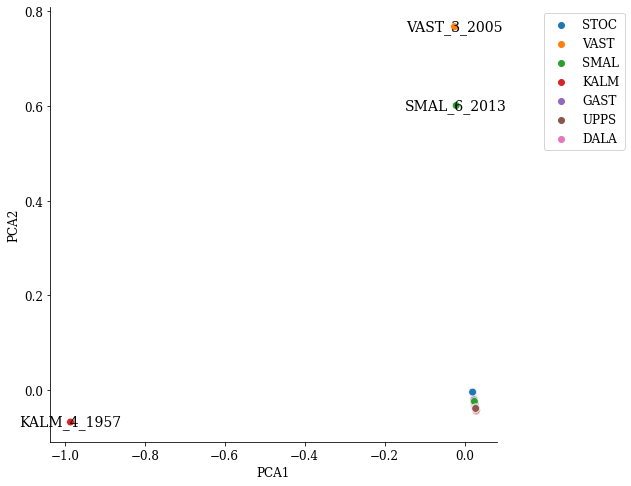

In [101]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.xlim(-0.1,0.1)
#plt.ylim(-0.1,0.8)
for i in range(len(df)):
    if df['PCA1'][i] < 0:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)
        
        
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')
    
plt.show()

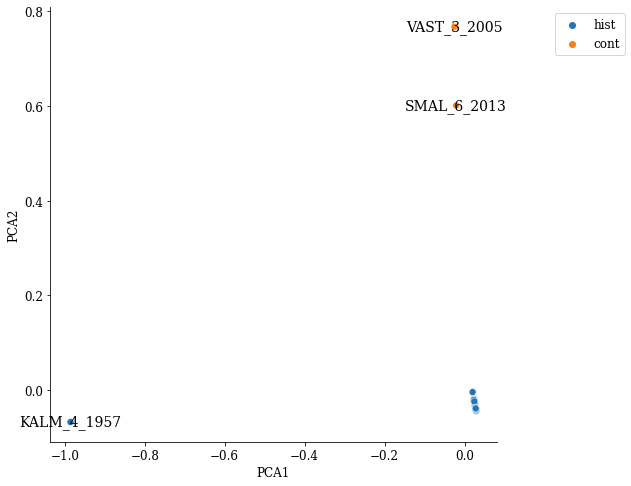

In [103]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Age'], s=50) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (10.0, 10.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

for i in range(len(df)):
    if df['PCA1'][i] < 0:       
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=14)

# Show the plot
plt.show()

## Metadata adding development

In [87]:
import pandas as pd

# Sample dataframe
data = {
    'A': [1, 2, 3, 4],
    'B': ['KAZA_1_2006_KAZA_1_2006', 'SLOV_1_1990_SLOV_1_1990', 'URAL_2_1995_URAL_2_1995', 'RUSS_4_2008_RUSS_4_2008'],
    'Last': ['KAZA', 'SLOV', 'URAL', 'RUSS']
}

df = pd.DataFrame(data)

# Categorization dictionary
category_dict = {
    'KAZA': 'CENTRAL',
    'SLOV': 'WEST',
    'URAL': 'EAST',
    'RUSS': 'EAST'
}

# Create the new column
df['Category'] = df['Last'].map(category_dict)

print(df)

   A                        B  Last Category
0  1  KAZA_1_2006_KAZA_1_2006  KAZA  CENTRAL
1  2  SLOV_1_1990_SLOV_1_1990  SLOV     WEST
2  3  URAL_2_1995_URAL_2_1995  URAL     EAST
3  4  RUSS_4_2008_RUSS_4_2008  RUSS     EAST


In [12]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_all_mcaller.miss20.pruned.eigenvec", delimiter=' ', header=None)
df


# Display the DataFrame
df=df.drop(df.columns[[0]], axis=1)
######df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
# Update the ID column
##df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,ID,popID
0,BAJK_1_2016_BAJK_1_2016,-0.065484,-0.000880,-0.051408,-0.036077,0.017175,0.012470,0.005862,0.012934,-0.008651,...,0.003877,0.146554,-0.020154,0.011742,0.085141,-0.012962,0.000419,0.023468,BAJK_1_2016,BAJK
1,KAZA_1_2006_KAZA_1_2006,-0.071009,-0.002774,-0.054913,-0.037967,0.018390,0.016598,0.009504,0.019736,-0.009173,...,0.006368,0.200449,-0.029309,0.018029,0.114191,-0.017339,0.000973,0.030681,KAZA_1_2006,KAZA
2,SLOV_1_1990_SLOV_1_1990,-0.059085,-0.032594,0.187884,0.132751,-0.060703,-0.011963,-0.008197,-0.148635,-0.032952,...,-0.002195,0.179281,0.117884,-0.750241,-0.280879,-0.441026,-0.023138,0.075672,SLOV_1_1990,SLOV
3,URAL_2_1995_URAL_2_1995,-0.054745,-0.028753,0.174404,0.123287,-0.057473,-0.015103,-0.011880,-0.214190,-0.045517,...,0.003457,-0.076507,-0.031761,0.187045,0.040363,-0.041425,-0.122991,0.373872,URAL_2_1995,URAL
4,RUSS_4_2008_RUSS_4_2008,-0.078534,-0.005518,-0.046994,-0.034117,0.018024,0.023592,0.012632,0.033834,-0.012505,...,0.007195,0.281592,-0.040521,0.023267,0.155848,-0.021328,0.001796,0.039637,RUSS_4_2008,RUSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KALM_4_1957_KALM_4_1957,0.317591,-0.564413,-0.476783,0.573775,0.042471,0.076819,-0.020387,-0.007039,0.000672,...,0.000159,0.005640,-0.001264,0.001175,-0.000230,-0.000319,0.000691,-0.000818,KALM_4_1957,KALM
69,GAST_3_1941_GAST_3_1941,-0.064753,0.001886,-0.075042,-0.051006,0.022479,0.009122,0.004132,-0.014757,0.011310,...,0.001511,0.009972,-0.005402,0.003264,-0.005669,0.003177,-0.002207,-0.003416,GAST_3_1941,GAST
70,ITAL_1_1946_ITAL_1_1946,0.205541,-0.208961,0.033410,-0.195269,-0.028559,-0.920847,-0.076755,0.037369,-0.005350,...,0.003575,0.052993,-0.007990,0.006023,0.016146,-0.003121,-0.000043,0.002142,ITAL_1_1946,ITAL
71,GAST_5_1943_GAST_5_1943,-0.063599,0.005297,-0.085498,-0.056019,0.023562,0.004912,0.002060,-0.032629,0.019260,...,-0.001449,-0.081193,0.010282,-0.006406,-0.056900,0.009970,-0.002147,-0.017574,GAST_5_1943,GAST


In [13]:
unique_values = df.iloc[:, -1].unique()
print(unique_values)

['BAJK' 'KAZA' 'SLOV' 'URAL' 'RUSS' 'JAPA' 'CHEH' 'KRAS' 'STOC' 'VAST'
 'SMAL' 'ALTA' 'KALM' 'POLA' 'VORO' 'BELA' 'GAST' 'UPPS' 'DALA' 'ITAL']


In [44]:
# Categorization dictionary
age_dict = {
    '1940s': 'hist',
    '1950s': 'hist',
    '1960s': 'hist',
    '1980s': 'hist',
    '1990s': 'cont',
    '2000s': 'cont',
    '2010s': 'cont'
}

df['Age'] = df['Decade'].map(age_dict)

age_dict

df

,1,PCA1,PCA2,4,5,6,7,8,9,10,...,18,19,20,21,ID,popID,Category,Year,Decade,Age
0,STOC_6_1965_STOC_6_1965,0.033609,-0.036993,0.008816,0.289296,-0.009345,-0.082857,-0.063043,-0.005537,-0.007055,...,0.240504,0.066768,-0.047145,0.003755,STOC_6_1965,STOC,SWEDEN,1965,1960s,hist
1,VAST_1_1983_VAST_1_1983,0.026072,-0.022169,-0.006038,0.141976,0.129502,0.935116,-0.247230,0.025541,-0.019291,...,0.000483,-0.003667,-0.007424,-0.003579,VAST_1_1983,VAST,SWEDEN,1983,1980s,hist
2,SMAL_4_1996_SMAL_4_1996,0.033754,-0.037640,0.010623,0.308735,-0.010469,-0.093078,-0.074508,-0.008241,-0.008276,...,-0.407183,-0.130667,0.055222,-0.007156,SMAL_4_1996,SMAL,SWEDEN,1996,1990s,cont
3,SMAL_5_1998_SMAL_5_1998,0.033516,-0.037065,0.010405,0.280594,-0.009363,-0.082637,-0.063670,-0.006424,-0.003478,...,0.138482,0.039618,-0.029757,-0.005669,SMAL_5_1998,SMAL,SWEDEN,1998,1990s,cont
4,VAST_3_2005_VAST_3_2005,-0.109335,0.635593,0.223801,0.006084,-0.707656,0.087912,-0.009868,0.032178,-0.020141,...,-0.004086,0.006504,-0.004412,0.005394,VAST_3_2005,VAST,SWEDEN,2005,2000s,cont
5,KALM_9_1981_KALM_9_1981,0.030774,-0.034309,0.004313,0.106527,0.002506,0.111525,0.541024,0.011630,-0.008041,...,-0.008859,-0.014888,0.019537,-0.038279,KALM_9_1981,KALM,SWEDEN,1981,1980s,hist
6,KALM_1_2018_KALM_1_2018,0.030261,-0.042654,0.010700,-0.007616,0.001200,0.010493,0.027019,0.032148,0.399737,...,0.005344,0.013920,0.018085,-0.025436,KALM_1_2018,KALM,SWEDEN,2018,2010s,cont
7,SMAL_6_2013_SMAL_6_2013,-0.108593,0.648000,0.228684,0.005009,0.693444,-0.098917,0.013584,0.037621,0.007882,...,-0.002988,0.002301,-0.005861,0.004825,SMAL_6_2013,SMAL,SWEDEN,2013,2010s,cont
8,KALM_10_1983_KALM_10_1983,0.029888,-0.035554,0.004966,0.114469,0.010517,0.145774,0.770144,0.015289,-0.067213,...,0.001537,0.002843,-0.002917,0.027830,KALM_10_1983,KALM,SWEDEN,1983,1980s,hist
9,VAST_2_1999_VAST_2_1999,-0.051788,0.286488,-0.943815,-0.012950,-0.002279,-0.022268,-0.004425,0.015916,0.003951,...,-0.001399,-0.002394,-0.001779,0.000029,VAST_2_1999,VAST,SWEDEN,1999,1990s,cont


In [107]:
category_dict = {
'KAZA': 'EAST',
 'SLOV': 'WEST',
 'URAL': 'EAST',
 'RUSS': 'EAST',
 'BAJK': 'EAST',
 'JAPA': 'EAST',
 'CHEH': 'WEST',
 'KRAS': 'EAST',
 'STOC': 'SWEDEN',
 'VAST': 'SWEDEN',
 'SMAL': 'SWEDEN',
 'ALTA': 'EAST',
 'KALM': 'SWEDEN',
 'POLA': 'SWEDEN',
 'VORO': 'WEST',
 'BELA': 'WEST',
 'GAST': 'SWEDEN',
 'UPPS': 'SWEDEN',
 'DALA': 'SWEDEN',
 'ITAL': 'WEST'}

In [19]:
df['Category'] = df['popID'].map(category_dict)

df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,ID,popID,Category
0,BAJK_1_2016_BAJK_1_2016,-0.065484,-0.000880,-0.051408,-0.036077,0.017175,0.012470,0.005862,0.012934,-0.008651,...,0.146554,-0.020154,0.011742,0.085141,-0.012962,0.000419,0.023468,BAJK_1_2016,BAJK,EAST
1,KAZA_1_2006_KAZA_1_2006,-0.071009,-0.002774,-0.054913,-0.037967,0.018390,0.016598,0.009504,0.019736,-0.009173,...,0.200449,-0.029309,0.018029,0.114191,-0.017339,0.000973,0.030681,KAZA_1_2006,KAZA,EAST
2,SLOV_1_1990_SLOV_1_1990,-0.059085,-0.032594,0.187884,0.132751,-0.060703,-0.011963,-0.008197,-0.148635,-0.032952,...,0.179281,0.117884,-0.750241,-0.280879,-0.441026,-0.023138,0.075672,SLOV_1_1990,SLOV,WEST
3,URAL_2_1995_URAL_2_1995,-0.054745,-0.028753,0.174404,0.123287,-0.057473,-0.015103,-0.011880,-0.214190,-0.045517,...,-0.076507,-0.031761,0.187045,0.040363,-0.041425,-0.122991,0.373872,URAL_2_1995,URAL,EAST
4,RUSS_4_2008_RUSS_4_2008,-0.078534,-0.005518,-0.046994,-0.034117,0.018024,0.023592,0.012632,0.033834,-0.012505,...,0.281592,-0.040521,0.023267,0.155848,-0.021328,0.001796,0.039637,RUSS_4_2008,RUSS,EAST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KALM_4_1957_KALM_4_1957,0.317591,-0.564413,-0.476783,0.573775,0.042471,0.076819,-0.020387,-0.007039,0.000672,...,0.005640,-0.001264,0.001175,-0.000230,-0.000319,0.000691,-0.000818,KALM_4_1957,KALM,SWEDEN
69,GAST_3_1941_GAST_3_1941,-0.064753,0.001886,-0.075042,-0.051006,0.022479,0.009122,0.004132,-0.014757,0.011310,...,0.009972,-0.005402,0.003264,-0.005669,0.003177,-0.002207,-0.003416,GAST_3_1941,GAST,SWEDEN
70,ITAL_1_1946_ITAL_1_1946,0.205541,-0.208961,0.033410,-0.195269,-0.028559,-0.920847,-0.076755,0.037369,-0.005350,...,0.052993,-0.007990,0.006023,0.016146,-0.003121,-0.000043,0.002142,ITAL_1_1946,ITAL,WEST
71,GAST_5_1943_GAST_5_1943,-0.063599,0.005297,-0.085498,-0.056019,0.023562,0.004912,0.002060,-0.032629,0.019260,...,-0.081193,0.010282,-0.006406,-0.056900,0.009970,-0.002147,-0.017574,GAST_5_1943,GAST,SWEDEN


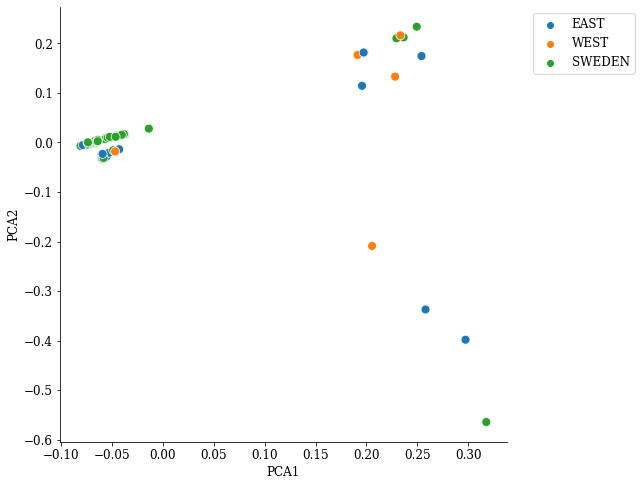

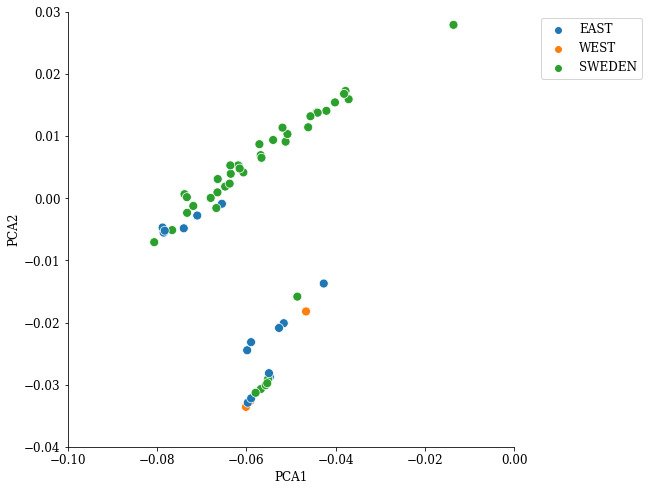

In [36]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

In [26]:
df['Year'] = df['ID'].str.extract(r'(\d{4})').astype(int)

# Function to categorize year by decades
def categorize_by_decade(year):
    start_decade = (year // 10) * 10
    return f"{start_decade}s"

# Apply the categorization function to create a new column
df['Decade'] = df['Year'].apply(categorize_by_decade)

df = df.rename(columns={2: 'PCA1', 3: 'PCA2'})

df

,1,PCA1,PCA2,4,5,6,7,8,9,10,...,17,18,19,20,21,ID,popID,Category,Year,Decade
0,BAJK_1_2016_BAJK_1_2016,-0.065484,-0.000880,-0.051408,-0.036077,0.017175,0.012470,0.005862,0.012934,-0.008651,...,0.011742,0.085141,-0.012962,0.000419,0.023468,BAJK_1_2016,BAJK,EAST,2016,2010s
1,KAZA_1_2006_KAZA_1_2006,-0.071009,-0.002774,-0.054913,-0.037967,0.018390,0.016598,0.009504,0.019736,-0.009173,...,0.018029,0.114191,-0.017339,0.000973,0.030681,KAZA_1_2006,KAZA,EAST,2006,2000s
2,SLOV_1_1990_SLOV_1_1990,-0.059085,-0.032594,0.187884,0.132751,-0.060703,-0.011963,-0.008197,-0.148635,-0.032952,...,-0.750241,-0.280879,-0.441026,-0.023138,0.075672,SLOV_1_1990,SLOV,WEST,1990,1990s
3,URAL_2_1995_URAL_2_1995,-0.054745,-0.028753,0.174404,0.123287,-0.057473,-0.015103,-0.011880,-0.214190,-0.045517,...,0.187045,0.040363,-0.041425,-0.122991,0.373872,URAL_2_1995,URAL,EAST,1995,1990s
4,RUSS_4_2008_RUSS_4_2008,-0.078534,-0.005518,-0.046994,-0.034117,0.018024,0.023592,0.012632,0.033834,-0.012505,...,0.023267,0.155848,-0.021328,0.001796,0.039637,RUSS_4_2008,RUSS,EAST,2008,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KALM_4_1957_KALM_4_1957,0.317591,-0.564413,-0.476783,0.573775,0.042471,0.076819,-0.020387,-0.007039,0.000672,...,0.001175,-0.000230,-0.000319,0.000691,-0.000818,KALM_4_1957,KALM,SWEDEN,1957,1950s
69,GAST_3_1941_GAST_3_1941,-0.064753,0.001886,-0.075042,-0.051006,0.022479,0.009122,0.004132,-0.014757,0.011310,...,0.003264,-0.005669,0.003177,-0.002207,-0.003416,GAST_3_1941,GAST,SWEDEN,1941,1940s
70,ITAL_1_1946_ITAL_1_1946,0.205541,-0.208961,0.033410,-0.195269,-0.028559,-0.920847,-0.076755,0.037369,-0.005350,...,0.006023,0.016146,-0.003121,-0.000043,0.002142,ITAL_1_1946,ITAL,WEST,1946,1940s
71,GAST_5_1943_GAST_5_1943,-0.063599,0.005297,-0.085498,-0.056019,0.023562,0.004912,0.002060,-0.032629,0.019260,...,-0.006406,-0.056900,0.009970,-0.002147,-0.017574,GAST_5_1943,GAST,SWEDEN,1943,1940s


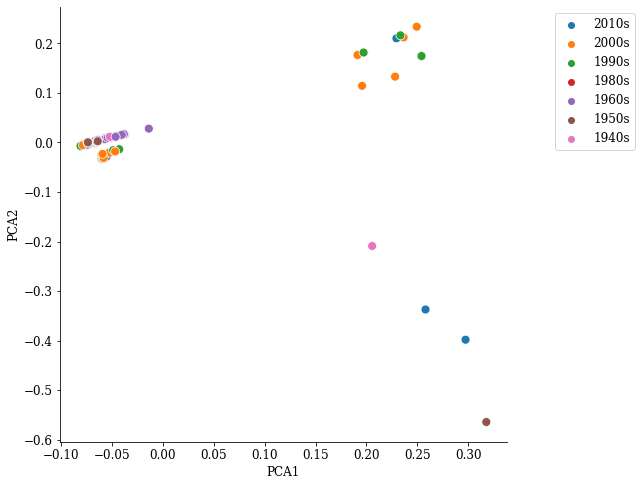

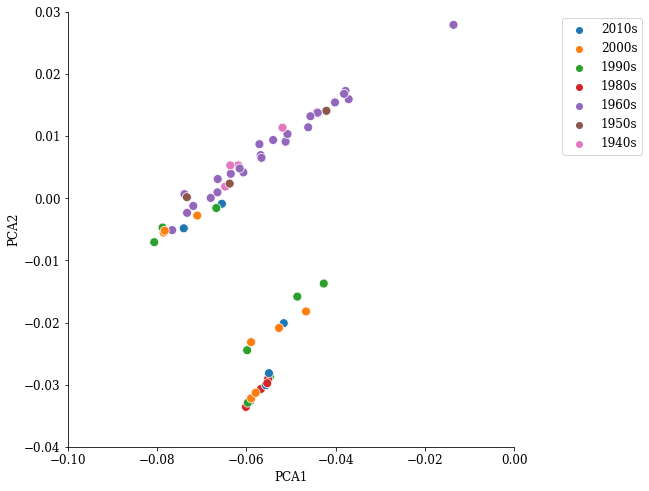

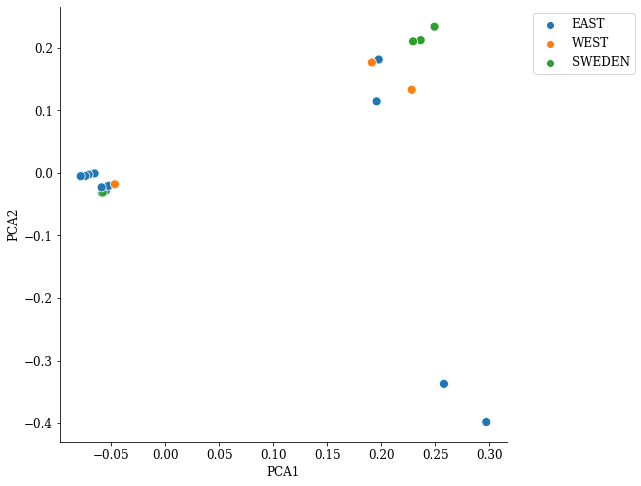

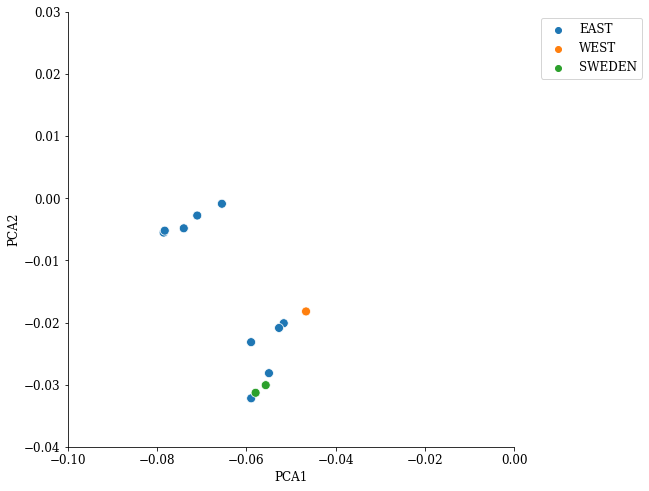

In [32]:
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()


sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()


filtered_df = df[df['Decade'].isin(['2000s', '2010s'])]
sns.scatterplot(x=filtered_df["PCA1"], y=filtered_df["PCA2"], hue=filtered_df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


filtered_df = df[df['Decade'].isin(['2000s', '2010s'])]
sns.scatterplot(x=filtered_df["PCA1"], y=filtered_df["PCA2"], hue=filtered_df['Category'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)
plt.show()

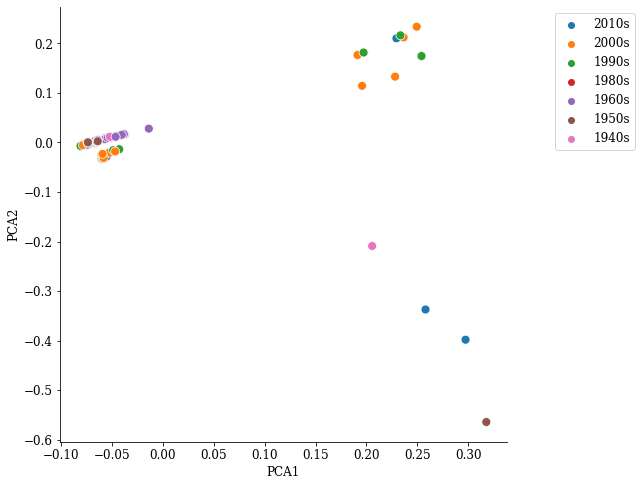

In [33]:
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

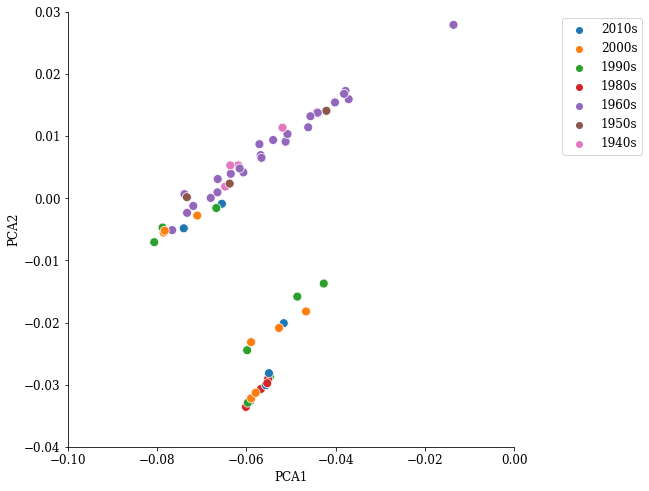

In [37]:
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df['Decade'], s=80) #,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine()
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (8.0, 8.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xlim(-0.1,0)
plt.ylim(-0.04,0.03)

#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

# Show the plot
plt.show()

# Full call extended QC

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

def generate_lists(from_chr,till_chr):
    color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]
    #label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
    file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]

    
def plot_quality_distribution(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.xlabel("Quality")
        plt.ylabel("Count")
        plt.title("Full Distribution of Quality Scores")
        sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)

    #plt.legend()
    plt.show()

def plot_quality_scores_below_200(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.xlabel("Quality")
        plt.ylabel("Count")
        plt.title("Quality Scores below 200")
        qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
        plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
        mean_qual = np.mean(var_qual["qual"])

    plt.show()


def plot_quality_scores_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Quality Scores Along the Chromosome")
        
    plt.legend()
    plt.show()

def plot_quality_scores_along_chromosome2(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
        
        plt.plot(var_qual['pos'],var_qual['qual'])
        #plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Quality Scores Along the Chromosome")
        
    plt.legend()
    plt.show()   


def plot_mean_depth(file_paths_gen, color_list,label_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                                names=["chr", "pos", "mean_depth", "var_depth"])
        sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3, label=label_list[i])
        plt.xlabel("Mean Depth")
        plt.ylabel("Count")
        plt.title("Mean Depth")
    plt.show()
    
    
def plot_depth_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Depth Along the Chromosome")
        
    plt.legend()
    plt.show()

def plot_mean_depth_100(file_paths_gen, color_list):    
    for i, file_path_gen in enumerate(file_paths_gen): 
        var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
        var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
        plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
        mean_depth = np.mean(var_depth["mean_depth"])
        #print(mean_depth)
        #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
        plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
        plt.xlabel("Mean Depth")
        plt.ylabel("Count")
        plt.title("Mean Depth below 200")
    plt.show() 
    
def plot_allele_frquency(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
        var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
        plt.xlabel("Allele Frequency")
        plt.ylabel("Count")
        plt.title("Distribution of Allele Frequency")
        plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
        mean_freq = np.mean(var_freq["maf"])
        #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
        plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
    plt.show()

def plot_minor_alleles(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
        var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
        plt.xlabel("Allele Frequency")
        plt.ylabel("Count")
        plt.title("Minor Allele Frequency")
        var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
        plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
    plt.show()

def plot_missing_sites(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
        plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
        plt.xlabel("Missingness")
        plt.ylabel("Count")
        plt.title("Missing Data")
    plt.show()

def plot_depth_per_indiv(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
        sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
        plt.xlabel("Mean Depth")
        plt.ylabel("Number of individuals")
        plt.title("Per Individual Depth")
    plt.show()

def plot_inbreding_coefficient(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                           names=["ind", "ho", "he", "nsites", "f"])
        plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
        plt.xlabel("f")
        plt.ylabel("Number of individuals")
        plt.title("Inbreeding coeficient")
    plt.show()



# L/O

In [63]:
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.meta.csv", delimiter=',')
df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,ID,popID,year,time,country
0,GAST_1_1941_GAST_1_1941,-0.030509,-0.028270,-0.247731,-0.012805,0.008864,0.004697,0.097096,0.090557,-0.092995,GAST_1_1941,GAST,1941,hist,swe
1,GAST_2_1941_GAST_2_1941,-0.035225,-0.009817,-0.098259,0.010800,-0.003453,-0.040524,0.057942,0.064749,0.042074,GAST_2_1941,GAST,1941,hist,swe
2,GAST_3_1941_GAST_3_1941,-0.041621,-0.000322,0.012224,-0.003925,0.002202,0.014635,0.002924,-0.020733,-0.016675,GAST_3_1941,GAST,1941,hist,swe
3,GAST_4_1941_GAST_4_1941,-0.050848,0.009795,0.019103,0.010203,0.016096,0.024237,0.008468,0.001704,-0.007174,GAST_4_1941,GAST,1941,hist,swe
4,GAST_5_1943_GAST_5_1943,-0.031113,-0.005485,-0.042047,0.025239,-0.009523,-0.002522,0.027949,-0.028462,-0.063397,GAST_5_1943,GAST,1943,hist,swe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,BAJK_3_2016_BAJK_3_2016,-0.021797,0.031261,0.076869,0.016044,0.016390,0.037616,-0.025416,-0.001160,0.012147,BAJK_3_2016,BAJK,2016,cont,abr
69,BAJK_1_2016_BAJK_1_2016,-0.049447,0.015015,0.054413,-0.001879,-0.010808,0.026160,-0.017030,-0.013659,-0.017223,BAJK_1_2016,BAJK,2016,cont,abr
70,BAJK_2_2016_BAJK_2_2016,-0.053682,0.021675,0.074194,0.008524,-0.005016,-0.001045,-0.019263,-0.007041,-0.021761,BAJK_2_2016,BAJK,2016,cont,abr
71,BAJK_4_2016_BAJK_4_2016,-0.047027,0.024907,0.059125,-0.008148,0.022251,-0.007465,-0.012454,-0.033137,-0.001397,BAJK_4_2016,BAJK,2016,cont,abr


In [47]:
palette = sns.color_palette("hsv", 73)
palette

[(1.0, 0.06948536360301065, 0.0),
 (1.0, 0.1389707272060213, 0.0),
 (1.0, 0.2316178786767022, 0.0),
 (1.0, 0.3011032422797128, 0.0),
 (1.0, 0.3937503937503937, 0.0),
 (1.0, 0.4632357573534044, 0.0),
 (1.0, 0.5558829088240852, 0.0),
 (1.0, 0.6253682724270958, 0.0),
 (1.0, 0.7180154238977768, 0.0),
 (1.0, 0.7875007875007874, 0.0),
 (1.0, 0.8801479389714684, 0.0),
 (0.9959555658085071, 0.9455888683829858, 0.0),
 (0.9727937779408368, 0.9919124441183264, 0.0),
 (0.8882341823518295, 1.0, 0.0),
 (0.8187488187488188, 1.0, 0.0),
 (0.726101667278138, 1.0, 0.0),
 (0.6566163036751272, 1.0, 0.0),
 (0.5639691522044463, 1.0, 0.0),
 (0.4944837886014357, 1.0, 0.0),
 (0.4018366371307548, 1.0, 0.0),
 (0.3323512735277442, 1.0, 0.0),
 (0.23970412205706326, 1.0, 0.0),
 (0.17021875845405265, 1.0, 0.0),
 (0.07757160698337173, 1.0, 0.0),
 (0.0235287477934537, 1.0, 0.015442504413092598),
 (0.0003669599257835228, 1.0, 0.061766080148432954),
 (0.0, 1.0, 0.15404569495487538),
 (0.0, 1.0, 0.22353062080241548),
 (0.0, 1.0, 0.3161771885991356),
 (0.0, 1.0, 0.3856621144466757),
 (0.0, 1.0, 0.47830868224339584),
 (0.0, 1.0, 0.547793608090936),
 (0.0, 1.0, 0.6404401758876557),
 (0.0, 1.0, 0.7099251017351961),
 (0.0, 1.0, 0.8025716695319163),
 (0.0, 1.0, 0.8720565953794563),
 (0.0, 1.0, 0.9647031631761764),
 (0.0, 0.9658116955911072, 1.0),
 (0.0, 0.8963263319880966, 1.0),
 (0.0, 0.8036791805174157, 1.0),
 (0.0, 0.7341938169144051, 1.0),
 (0.0, 0.6415466654437243, 1.0),
 (0.0, 0.5720613018407144, 1.0),
 (0.0, 0.4794141503700329, 1.0),
 (0.0, 0.40992878676702216, 1.0),
 (0.0, 0.31728163529634135, 1.0),
 (0.0, 0.24779627169333063, 1.0),
 (0.0, 0.15514912022264993, 1.0),
 (0.0, 0.08566375661963932, 1.0),
 (0.015440535661123769, 0.03161892867775246, 1.0),
 (0.07646875845405214, 0.0, 1.0),
 (0.14595412205706287, 0.0, 1.0),
 (0.23860127352774382, 0.0, 1.0),
 (0.30808663713075457, 0.0, 1.0),
 (0.40073378860143555, 0.0, 1.0),
 (0.47021915220444627, 0.0, 1.0),
 (0.5628663036751272, 0.0, 1.0),
 (0.632351667278138, 0.0, 1.0),
 (0.724998818748819, 0.0, 1.0),
 (0.7944841823518297, 0.0, 1.0),
 (0.8871313338225106, 0.0, 1.0),
 (0.9566166974255214, 0.0, 1.0),
 (0.9878673536761773, 0.0, 0.9617652926476454),
 (1.0, 0.0, 0.8812507875007872),
 (1.0, 0.0, 0.8117654238977766),
 (1.0, 0.0, 0.7191182724270964),
 (1.0, 0.0, 0.6496329088240851),
 (1.0, 0.0, 0.5569857573534043),
 (1.0, 0.0, 0.4875003937503936),
 (1.0, 0.0, 0.39485324227971275),
 (1.0, 0.0, 0.32536787867670214),
 (1.0, 0.0, 0.23272072720602122),
 (1.0, 0.0, 0.16323536360301072)]

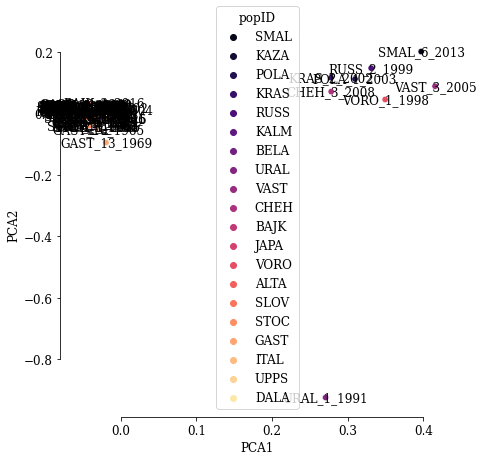

No handles with labels found to put in legend.


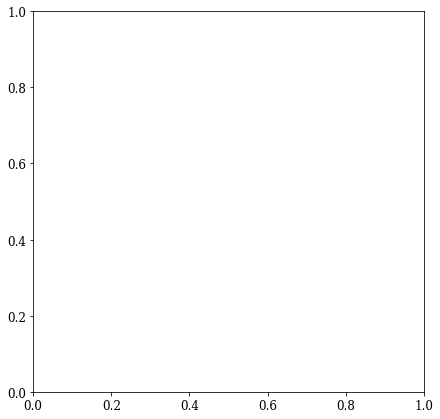

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatterplot
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette="magma")
sns.despine(offset=2, trim=True)
#plt.xlabel("PCA 1 (" + split_eigval[0] + "%)")
#plt.ylabel("PCA 2 (" + split_eigval[1] + "%)")

# Add text labels
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Save the scatterplot
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png", bbox_inches="tight")
plt.show()

# Create a separate legend plot
legend = plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/legend.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/legend.png", bbox_inches="tight")

# Show the scatterplot
plt.show()

# Extras

In [98]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.000097,-0.008168,-0.008632,0.000123,0.030216,0.014718,0.002400,-0.016154,-0.036828
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,-0.002885,-0.003945,0.029606,-0.036448,-0.085937,-0.214022,0.191938,-0.058535,-0.013052
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003818,-0.034181,-0.000400,0.001945,0.005760,-0.034160,0.012775,0.050932,0.008138
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.005725,-0.042547,-0.019146,0.046944,-0.014321,0.004577,0.015292,0.040597,0.071073
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,0.010086,-0.003025,-0.013545,0.055810,0.016690,-0.061142,0.078322,0.033540,0.018149
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,0.016871,-0.029300,0.000522,0.030783,-0.006152,0.023856,-0.105348,0.039966,-0.020748
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,0.020229,-0.016730,-0.000635,0.022065,0.020973,-0.029956,0.060427,-0.030374,0.029982
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,0.012222,-0.047360,0.011949,0.060658,0.010854,0.007260,-0.003843,0.002074,-0.021084
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,0.010571,-0.023526,-0.010847,0.054778,0.103059,-0.070647,-0.084763,0.022748,0.060486
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,0.011358,0.002832,-0.019333,0.034256,-0.036370,0.004291,-0.055821,-0.006273,-0.059392


In [2]:
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

NameError: name 'sns' is not defined

In [11]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['chrom','begin','end','repts']
df3 = df3.drop(labels=[171], axis=0)
df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3

#df4= pd.concat([df3,df],axis=1)
#print(df4)
#df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
#df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
#df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
#df4 = df4.drop(labels=[347], axis=0)
#df4[100:150]

LR999924.1	200001	300000	66


,chrom,begin,end,repts
0,LR999924.1,1.0,100000,181.0
1,LR999924.1,100001.0,200000,129.0
2,LR999924.1,200001.0,300000,66.0
3,LR999924.1,300001.0,400000,58.0
4,LR999924.1,400001.0,500000,80.0
5,LR999924.1,500001.0,600000,83.0
6,LR999924.1,600001.0,700000,126.0
7,LR999924.1,700001.0,800000,109.0
8,LR999924.1,800001.0,900000,110.0
9,LR999924.1,900001.0,1000000,135.0


In [ ]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['chrom','begin','end','repts']
df3 = df3.drop(labels=[171], axis=0)
df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3

Text(0,0.5,'Number of repeats')

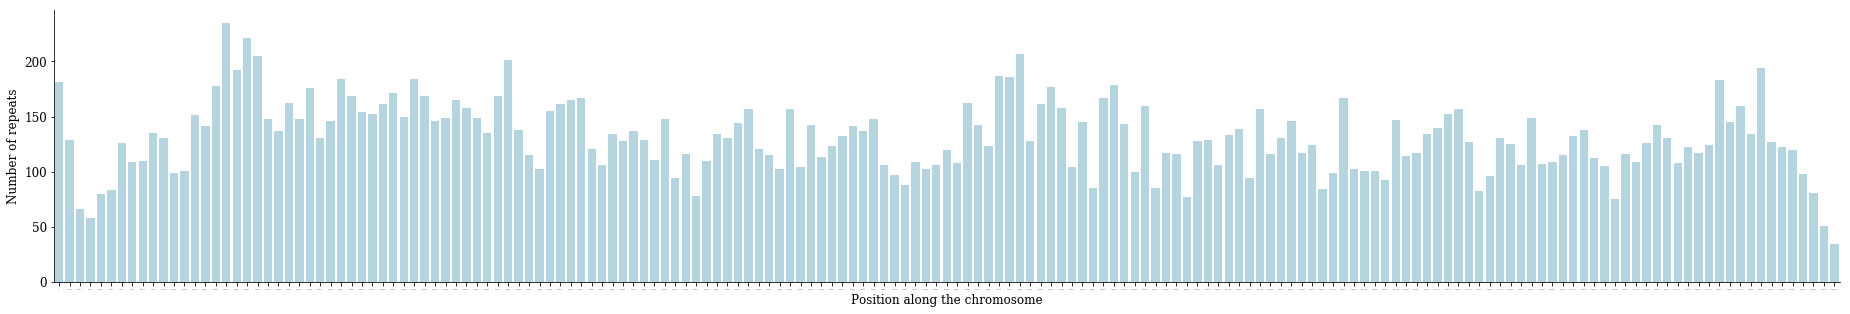

In [24]:
ml.rcParams['figure.figsize'] = (32, 5)
sns.barplot(x=df3["begin"], y=df3["repts"] , color='lightblue')
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=1)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the chromosome")
plt.ylabel("Number of repeats")
plt.show()



## Dataset 1: Variants w/o singletons and doubletons 

First, PCA analysis was preformed for the data with only necessary filtering to retain maximum coverage.
Short summary of filtering:
- Input file from Aurora: `cardui_migrdiv_indv.vcf.gz`
- Maximum missing % of individuals: 0.3
- Minor allele frequency cutoff fixed to 0.006: which correspond to removing singletons only in dataset of 347 individuals 
- Variant depth set to maximum possible: 4 (see justification in Evernote)


### Creating data frames

In [98]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.000097,-0.008168,-0.008632,0.000123,0.030216,0.014718,0.002400,-0.016154,-0.036828
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,-0.002885,-0.003945,0.029606,-0.036448,-0.085937,-0.214022,0.191938,-0.058535,-0.013052
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003818,-0.034181,-0.000400,0.001945,0.005760,-0.034160,0.012775,0.050932,0.008138
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.005725,-0.042547,-0.019146,0.046944,-0.014321,0.004577,0.015292,0.040597,0.071073
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,0.010086,-0.003025,-0.013545,0.055810,0.016690,-0.061142,0.078322,0.033540,0.018149
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,0.016871,-0.029300,0.000522,0.030783,-0.006152,0.023856,-0.105348,0.039966,-0.020748
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,0.020229,-0.016730,-0.000635,0.022065,0.020973,-0.029956,0.060427,-0.030374,0.029982
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,0.012222,-0.047360,0.011949,0.060658,0.010854,0.007260,-0.003843,0.002074,-0.021084
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,0.010571,-0.023526,-0.010847,0.054778,0.103059,-0.070647,-0.084763,0.022748,0.060486
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,0.011358,0.002832,-0.019333,0.034256,-0.036370,0.004291,-0.055821,-0.006273,-0.059392


### Plotting

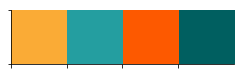

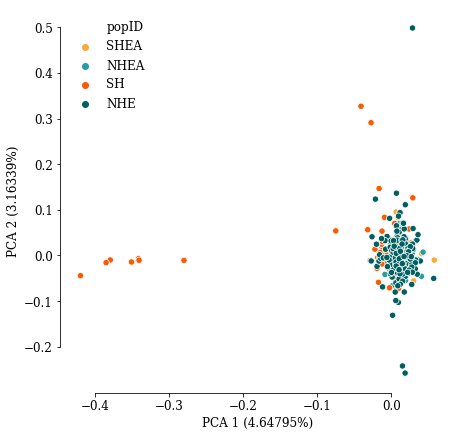

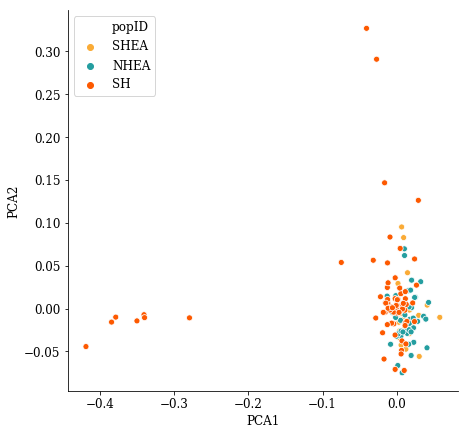

In [99]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()


df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
#plt.show()





#df

#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)

#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

## Dataset 1: Variants w/o singletons and doubletons, no LD

We observe distinct outliers in Southern Hemisphere, all belonging to Namibia sampling site. Such pattern, along with excessive grouping of other populations may be an effect of LD in the sample. Here we attempt to correct for LD, removing SNPs, where r^2>0.2 on 50Kb overlapping blocks (performed in plink).

### Creating data frames

In [5]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.005846,-0.010196,-0.010147,-0.027611,0.013351,-0.017578,0.003775,0.023112,0.007361
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,0.004939,-0.000208,0.002408,0.072212,-0.225054,-0.052822,0.094076,-0.072573,0.089144
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003944,-0.030819,-0.005309,-0.006589,-0.019863,-0.021010,-0.011668,-0.009252,-0.019089
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,-0.006295,-0.025649,-0.044768,0.010433,0.002226,0.028384,0.018244,-0.055023,-0.013553
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,-0.009012,-0.003696,-0.074965,-0.017635,-0.071685,-0.037575,0.027057,-0.054784,0.015043
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,-0.015221,-0.014269,0.001732,0.003353,0.053557,0.024802,-0.047732,0.070019,-0.042085
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,-0.021568,-0.013365,-0.030854,-0.016639,-0.020782,0.008766,0.060172,-0.038753,0.025546
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,-0.009668,-0.042449,-0.049795,0.017671,0.022819,-0.031384,0.029530,0.007656,-0.000353
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,-0.007123,-0.008352,-0.079365,-0.073373,-0.014060,-0.001127,-0.107306,0.029293,0.038103
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,-0.011158,0.004112,-0.014394,0.026939,-0.003889,0.052398,-0.007890,0.094536,-0.012244


### Plotting

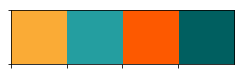

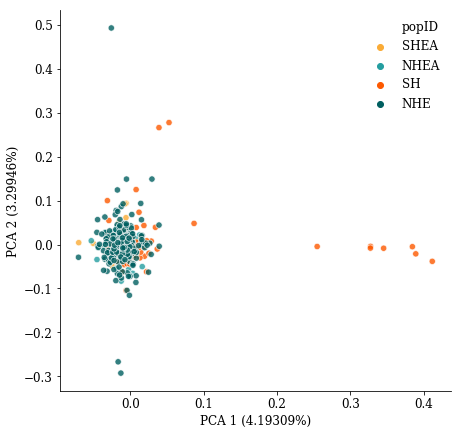

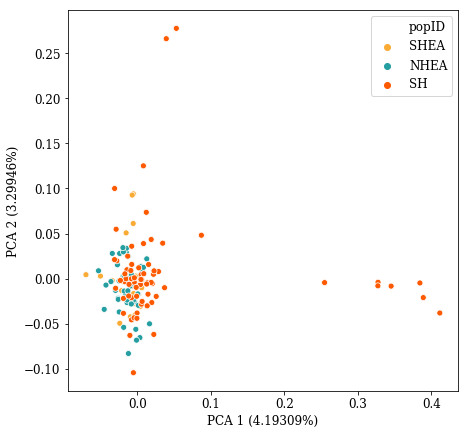

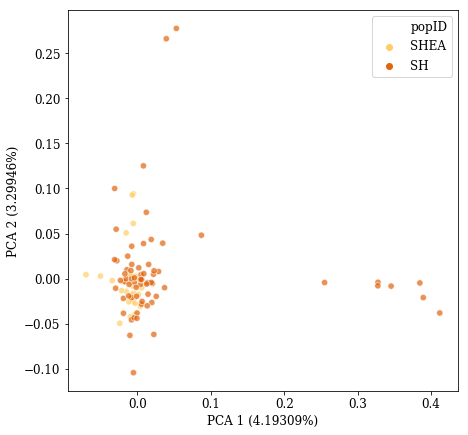

Text(0.5,0,'PCA 2 (3.29946%)')

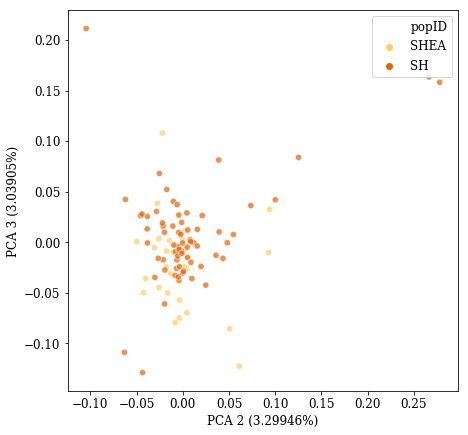

In [43]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
sns.palplot(sns.color_palette())
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.png",bbox_inches="tight")
plt.show()

df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#sns.despine(offset=0, trim=True)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.png",bbox_inches="tight")
plt.show()

#df["alpha"] = np.where(dfnor, 0, 1)
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
plt.show()
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA2'], y=data['PCA3'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 3 ("+ (split_eigval[2])+"%)")
plt.xlabel("PCA 2 ("+split_eigval[1]+"%)")
#sns.scatterplot(x=north['PCA1'], y=north['PCA2'], hue=north['popID'])
#north

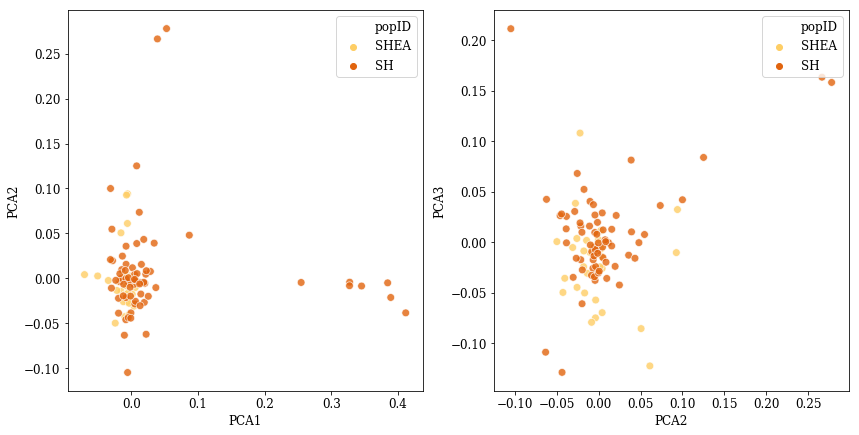

In [56]:
#fig_dims = (6, 6)
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.png",bbox_inches="tight")

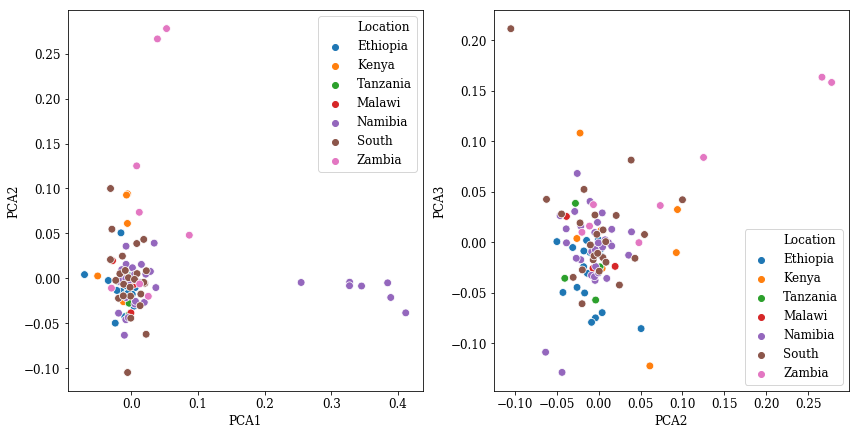

In [73]:
#fig_dims = (6, 6)
#sns.set_palette("muted")
 
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Location'],palette="tab10",s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['Location'], palette="tab10",s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.png",bbox_inches="tight")

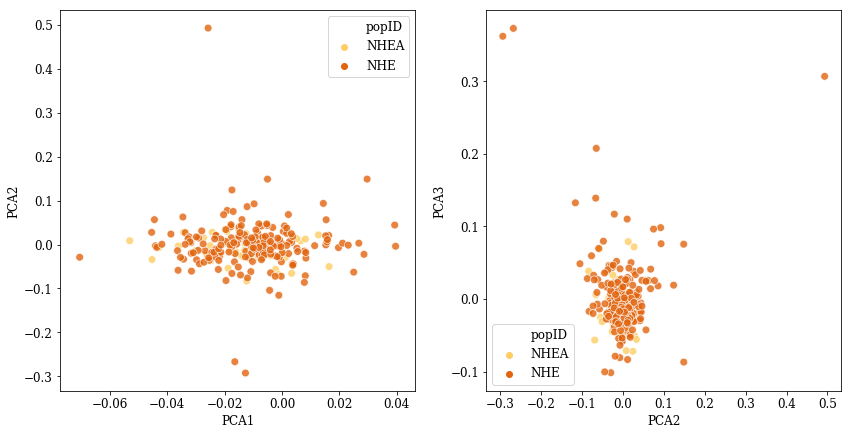

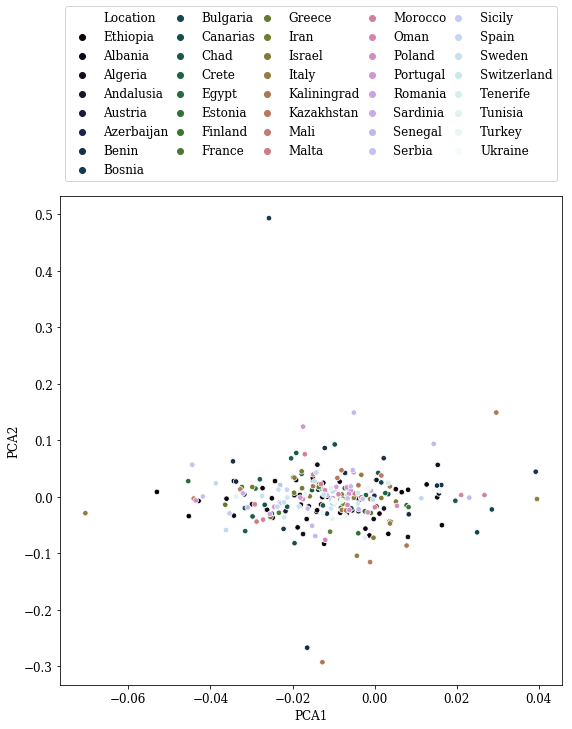

In [102]:
#fig_dims = (6, 6)
data_north=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]

ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.png",bbox_inches="tight") 
plt.show()
    
ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="cubehelix",s=30)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.png",bbox_inches="tight")

In [108]:
#data3=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]
df.loc[df["PCA2"] >= 0.2]
#174 158 249
df.loc[df["PCA2"] <= -0.15]

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,alpha
158,Azerbaijan,14M918,Azerbaijan_14M918,NHE,Azerbaijan_14M918,-0.016421,-0.267026,0.372889,-0.080433,-0.220775,0.009525,-0.215330,0.161766,-0.033656,0
249,Kaliningrad,15O460,Kaliningrad_15O460,NHE,Kaliningrad_15O460,-0.012714,-0.292747,0.362053,-0.069919,-0.196652,0.090881,-0.103491,-0.013407,0.040324,0


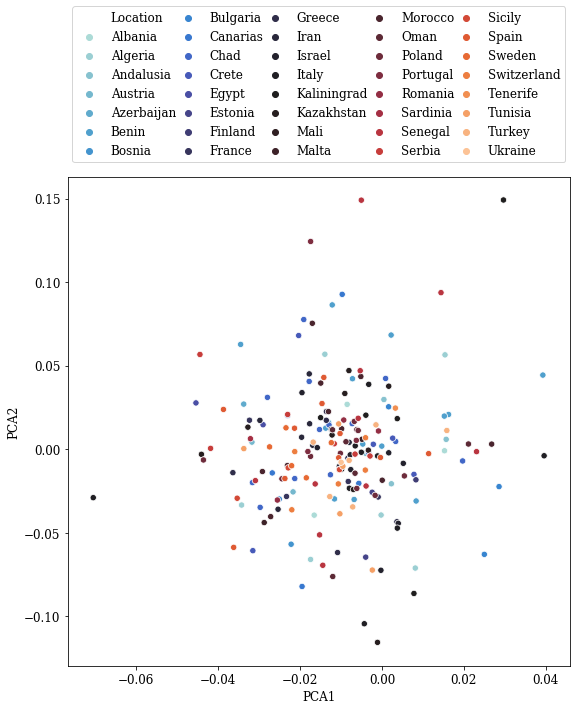

In [119]:
data = df.drop(labels=[174,158,249], axis=0)
data_north=data.loc[(data["popID"] == "NHE")]
data_north

ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="icefire",s=40)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.png",bbox_inches="tight")

## Dataset 2: Rare variants, no LD (Aurora)

Here we briefly check population structure based on rare variants (MAF: 0.001-0.010, MAC: 1-4)

### Creating data frames

In [120]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
#eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)


,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.002802,0.005417,-0.004222,0.001314,0.005840,0.006859,-0.010284,0.008576,-0.001835
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,0.002761,0.001727,-0.006147,0.007999,0.004541,0.014940,0.011748,0.011324,-0.003060
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003473,0.004805,-0.002392,0.011113,-0.004423,0.009877,-0.002200,0.016224,-0.009174
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.004469,0.004976,-0.000792,-0.008095,-0.014988,0.016938,-0.004317,0.014393,0.001216
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,0.004953,0.000618,-0.002443,-0.006029,0.003743,0.008389,0.003923,0.001034,-0.011354
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,0.001845,0.005825,0.002754,0.023064,0.009874,-0.020175,-0.033340,0.019036,0.015128
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,0.004616,0.006254,-0.008101,-0.000949,0.000912,0.014820,-0.001974,0.009565,-0.000436
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,0.001977,0.009308,0.002357,0.012593,0.048538,-0.001260,-0.056441,-0.024183,0.009759
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,0.006280,-0.030380,-0.011089,0.026257,-0.015191,0.024882,0.037571,-0.019018,0.015673
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,0.002480,0.004672,-0.004572,-0.003449,0.006982,-0.000357,0.001561,0.013991,-0.006121


### Plotting

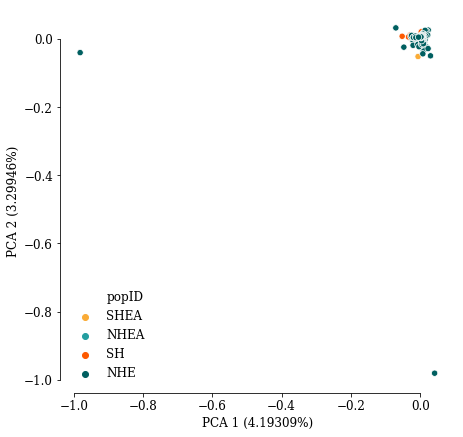

In [123]:
flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.png",bbox_inches="tight")
plt.show()

In [4]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
#dftmp2 =dftmp2.drop(dftmp2.columns[0], axis=1)
#dftmp2["hem"] = dftmp2['popID'] 
#dftmp2=dftmp2["hem"].str.split('H',expand=True)
#dftmp2 =dftmp2.drop(dftmp2.columns[1], axis=1)
#dftmp2.columns=["hem"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
#remove outliers
#df = df.drop(labels=[347,241,148], axis=0)
df[0:50]

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.002802,0.005417,-0.004222,0.00131391,0.00583967,0.00685936,-0.0102844,0.00857632,-0.00183528
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,0.002761,0.001727,-0.006147,0.00799899,0.0045411,0.0149395,0.0117477,0.011324,-0.00305958
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003473,0.004805,-0.002392,0.0111125,-0.00442269,0.00987714,-0.00219994,0.0162244,-0.0091744
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.004469,0.004976,-0.000792,-0.00809506,-0.0149882,0.0169377,-0.00431722,0.0143929,0.00121647
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,0.004953,0.000618,-0.002443,-0.00602892,0.00374283,0.00838945,0.00392339,0.00103417,-0.0113536
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,0.001845,0.005825,0.002754,0.0230639,0.00987362,-0.0201748,-0.0333398,0.0190355,0.0151279
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,0.004616,0.006254,-0.008101,-0.00094936,0.000911696,0.0148198,-0.00197365,0.00956534,-0.000435603
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,0.001977,0.009308,0.002357,0.0125927,0.048538,-0.00125992,-0.0564411,-0.0241833,0.00975902
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,0.006280,-0.030380,-0.011089,0.0262571,-0.0151913,0.0248822,0.0375713,-0.0190177,0.0156729
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,0.002480,0.004672,-0.004572,-0.00344859,0.00698174,-0.000356601,0.00156139,0.0139908,-0.00612109


1.96112


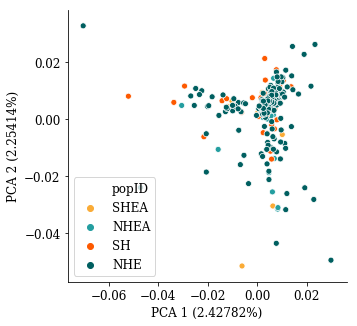

In [132]:
#print(df['loc'])
#df = df.drop(labels=[241,148], axis=0)
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'])#,palette="dark")
#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
#plt.legend(loc='center left') #mode="expand") #loc='center left', bbox_to_anchor=(1, 0.5),
           #ncol=2, mode="expand", borderaxespad=0.4)
plt.legend(loc='lower left')#, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(bbox_to_anchor=(0., 1.0, 1., .102), loc='lower left') #,
          #ncol=2, mode="expand", borderaxespad=0.4)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
#plt.legend([])
#plt.legend('',frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

In [145]:
#Check outliers

#df['PCA1'].max()
print(df['PCA1'].idxmin(axis = 0))
print(df['PCA2'].idxmin(axis = 0))

241
148


## Dataset 3

In [6]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.004174,-0.021558,0.041394,0.026197,-0.003011,0.014104,0.021737,0.048419,0.030903
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,0.014325,0.007990,-0.009897,-0.018930,0.072188,0.020528,0.081598,-0.044336,0.008712
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.015374,-0.002143,0.037596,0.022956,0.037783,0.025437,-0.005848,0.012683,-0.028088
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.005294,0.001047,-0.016138,-0.007664,0.048390,0.018202,-0.055755,-0.001855,-0.021302
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,-0.004514,-0.041366,-0.028656,-0.088044,0.066932,0.013013,-0.061201,-0.006533,0.025859
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,-0.022096,-0.001534,0.030158,0.021879,-0.016596,-0.003050,-0.007015,0.014103,0.005532
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,-0.032298,0.019302,-0.001643,-0.042877,0.021668,-0.027412,0.010616,0.038573,-0.011102
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,-0.022608,-0.017115,0.029765,-0.017725,0.044425,0.014075,-0.015173,0.042587,-0.013373
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,-0.007699,-0.066929,0.045378,-0.017565,0.029074,0.133797,0.052516,-0.017617,0.051133
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,-0.021504,0.006249,-0.043836,0.026296,-0.044476,0.036902,0.012547,0.028114,-0.015742


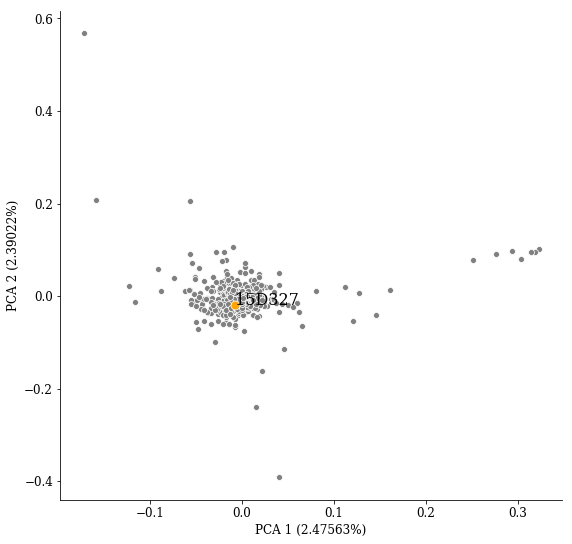

In [25]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
#sns.palplot(sns.color_palette())
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], color='grey')
sns.scatterplot(xout, yout, color='orange', s=80)#, hue=df['popID'], s=20,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (9.0, 9.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
#plt.text(df['PCA1'],df['PCA2'],"TOT", color='red')
plt.text(xout,yout,"15D327",size=16)#, color='red')
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.png",bbox_inches="tight")
plt.show()

In [15]:
#dot labler
xout=df['PCA1'][df["FullID"]=='Namibia_15D327']
yout=df['PCA2'][df["FullID"]=='Namibia_15D327']

## ADMIXTURE

In [3]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ADMIXTURE/cardui_migrdiv_indv_rarev_md25.2.Q").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['pop1','pop2']
df3

df4= pd.concat([df3,df],axis=1)
#print(df4)
df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
df4 = df4.drop(labels=[347], axis=0)
df4[100:150]

0.000010 0.999990


NameError: name 'df' is not defined

In [ ]:
ml.rcParams['figure.figsize'] = (32, 5)
#index = range(len(df4["FullID"]))
plt.bar(df4["FullID"],height=1)#,width=0.98)
#plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
#index = range(len(df4["FullID"]))
#plt.xticks(index, df4["FullID"])  # set the X ticks and labels
#sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("SHEA  SH   NHEA  NHE")
plt.ylabel("inferred allele frequences")

# show the graph
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v4.pdf",bbox_inches="tight")
#plt.show

In [ ]:
sns.barplot(x=df3[""], y=df4["pop1"], color='lightblue')

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# #print(df4)
# #df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# #df4.sort_values(by=["pop2"], inplace=True)
# df4.sort_values(["pop", "popID"])#, ascending = (False, True))
# #print(df)
# #df4 = df4.drop(labels=[347], axis=0)
# df4[167:190]

In [ ]:
# ml.rcParams['figure.figsize'] = (30, 5)
# #index = range(len(df4["FullID"]))
# plt.bar(df5["FullID"],height=1)#,width=0.98)
# #plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# #index = range(len(df4["FullID"]))
# #plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# sns.barplot(x=df5["FullID"], y=df5["pop1"], color='lightblue')
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=8)
# plt.rcParams['axes.spines.left'] = False
# #plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# #plt.rcParams['axes.spines.bottom'] = False
# plt.xlabel("")
# plt.ylabel("inferred allele frequences")
# index = range(len(df5["FullID"]))
# plt.xticks(index, df5["FullID"])

# # show the graph
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v5.pdf",bbox_inches="tight")
# plt.show

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# print(df4)
# df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# df4.sort_values(by=["pop2"], inplace=True)
# print(df4)
# #sns.axes_style("whitegrid")
# ml.rcParams['figure.figsize'] = (30, 5)
# plt.bar(df4["FullID"],height=1)#,width=0.98)
# plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# index = range(len(df4["FullID"]))
# plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #bar1 = sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# #bar2 = sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue',edgecolor="none")
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=6)
# #plt.rcParams['axes.spines.left'] = False
# plt.rcParams['axes.spines.right'] = False
# #plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.bottom'] = False

# #plt.show()  

# #plt.bar(df4["FullID"],height=1)

# #print(df4["pop1"])
# #tips = sns.load_dataset("tips")
# #tips
                         

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# #bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# # add legend
# #top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
# #bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# #plt.legend(handles=[top_bar, bottom_bar])

# # show the graph
# #plt.show()
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_3.pdf",bbox_inches="tight")